# Analitics and data mining
Author: Arkadiusz Carzyński (241335)

Data: spam.dat


# 1. Classifier algorithms

### Import libraries

In [32]:
import pandas as pd
import sys  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.ensemble import AdaBoostClassifier

### Load data

In [33]:
!{sys.executable} -m pip install --user matplotlib
data_frame = pd.read_csv('./data/spam.dat')

### Data size

In [34]:
data_frame.shape

(4789, 463)

In [35]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4789 entries, 0 to 4788
Columns: 463 entries, ACT_NOW to target
dtypes: int64(462), object(1)
memory usage: 16.9+ MB


### Data describe

In [36]:
data_frame.describe()

,ACT_NOW,ADDRESSES_ON_CD,ADULT_SITE,ADVERT_CODE,ADVERT_CODE2,ALL_CAPS_HEADER,ALL_CAP_PORN,ALL_NATURAL,AMATEUR_PORN,AMAZING,...,X_AUTH_WARNING,X_ENC_PRESENT,X_LIBRARY,X_LIST_UNSUBSCRIBE,X_MSMAIL_PRIORITY_HIGH,X_PRECEDENCE_REF,X_PRIORITY_HIGH,X_STORMPOST_TO,X_X_PRESENT,YOUR_INCOME
count,4789.000000,4789.0,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,...,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000
mean,0.008144,0.0,0.006056,0.000209,0.006682,0.000626,0.005638,0.007308,0.001879,0.002088,...,0.315097,0.001044,0.000626,0.012946,0.009397,0.000418,0.019420,0.000835,0.001253,0.000626
std,0.089883,0.0,0.077590,0.014450,0.081478,0.025023,0.074882,0.085185,0.043315,0.045653,...,0.464603,0.032298,0.025023,0.113055,0.096489,0.020434,0.138009,0.028892,0.035377,0.025023
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Is data balanced?

In [37]:
data_frame['target'].value_counts()

no     2949
yes    1840
Name: target, dtype: int64

### Split data into train and test

In [38]:
X = data_frame.drop(['target'], axis=1)
y = data_frame.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=331, test_size=0.33)
print(f'Train rows={X_train.shape[0]}, test rows: {X_test.shape[0]}')

Train rows=3208, test rows: 1581


### SVM

SVM score = 0.9759645793801391


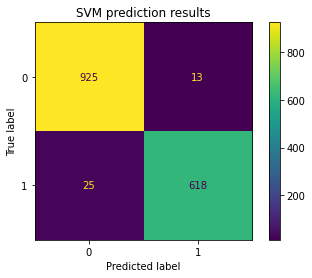

tp=618, fn=25, fp=13, tn=925
sensitivity=96.112%, specificity=98.6141%
fpr=1.3859%, fnr=3.888%


In [39]:
# classifier
svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm.fit(X_train, y_train)
y_prediction_svm = svm.predict(X_test)
svm_score = svm.score(X_test, y_test)
print(f'SVM score = {svm_score}')

# confusion matrix
cm = confusion_matrix(y_test, y_prediction_svm)
tn, fp, fn, tp = cm.ravel()
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('SVM prediction results')
plt.show()

# results
print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')
sensitivity_svm = round(100 * tp / (tp + fn), 4)
specificity_svm = round(100* tn / (fp + tn), 4)
print(f'sensitivity={sensitivity_svm}%, specificity={specificity_svm}%')

fpr_svm = round(100 - specificity_svm, 4)
fnr_svm = round(100 - sensitivity_svm, 4)
print(f'fpr={fpr_svm}%, fnr={fnr_svm}%')

### kNN

kNN score=0.946236559139785


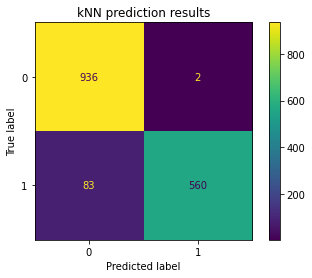

tp=560, fn=83, fp=2, tn=936
sensitivity=87.0918%, specificity=99.7868%
fpr=0.2132%, fnr=12.9082%


In [40]:
# classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_prediction_knn = knn.predict(X_test)
knn_score = knn.score(X_test, y_test)
print(f'kNN score={knn_score}')

# confusion matrix
cm = confusion_matrix(y_test, y_prediction_knn)
tn, fp, fn, tp = cm.ravel()
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title(label='kNN prediction results')
plt.show()

# results
print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')
sensitivity_knn = round(100 * tp / (tp + fn), 4)
specificity_knn = round(100 * tn / (fp + tn), 4)
print(f'sensitivity={sensitivity_knn}%, specificity={specificity_knn}%')

fpr_knn = round(100 - specificity_knn, 4)
fnr_knn = round(100 - sensitivity_knn, 4)
print(f'fpr={fpr_knn}%, fnr={fnr_knn}%')

### Naive Bayes

Naive bayes score = 0.9728020240354206


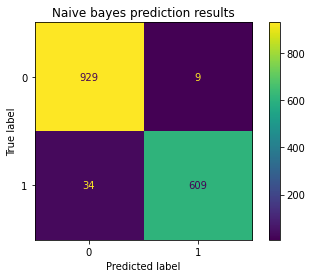

tp=609, fn=34, fp=9, tn=929
sensitivity=94.7123%, specificity=99.0405%
fpr=0.9595%, fnr=5.2877%


In [41]:
# classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_prediction_gnb = gnb.predict(X_test)
gnb_score = gnb.score(X_test, y_test)
print(f'Naive bayes score = {gnb_score}')

# confusion matrix
cm = confusion_matrix(y_test, y_prediction_gnb)
tn, fp, fn, tp = cm.ravel()
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Naive bayes prediction results')
plt.show()

# results
print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')
sensitivity_gnb = round(100 * tp / (tp + fn), 4)
specificity_gnb = round(100 * tn / (fp + tn), 4)
print(f'sensitivity={sensitivity_gnb}%, specificity={specificity_gnb}%')

fpr_gnb = round(100 - specificity_gnb, 4)
fnr_gnb = round(100 - sensitivity_gnb, 4)
print(f'fpr={fpr_gnb}%, fnr={fnr_gnb}%')

### MLP

MLP score = 0.9835547122074636


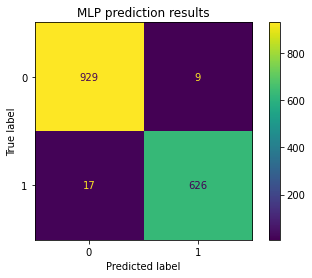

tp=626, fn=17, fp=9, tn=929
sensitivity=97.3561%, specificity=99.0405%
fpr=0.9595%, fnr=2.6439%


In [42]:
# classifier
mlp = MLPClassifier(random_state=2115, max_iter=4000, hidden_layer_sizes=(100,))
mlp.fit(X_train, y_train)
y_prediction_mlp = mlp.predict(X_test)
mlp_score = mlp.score(X_test, y_test)
print(f'MLP score = {mlp_score}')

# confusion matrix
cm = confusion_matrix(y_test, y_prediction_mlp)
tn, fp, fn, tp = cm.ravel()
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title(label='MLP prediction results')
plt.show()

# prediction results
print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')
sensitivity_mlp = round(100 * tp / (tp + fn), 4)
specificity_mlp = round(100 * tn / (fp + tn), 4)
print(f'sensitivity={sensitivity_mlp}%, specificity={specificity_mlp}%')

fpr_mlp = round(100 - specificity_mlp, 4)
fnr_mlp = round(100 - sensitivity_mlp, 4)
print(f'fpr={fpr_mlp}%, fnr={fnr_mlp}%')

### Decision tree

Decision tree score = 0.9765970904490828


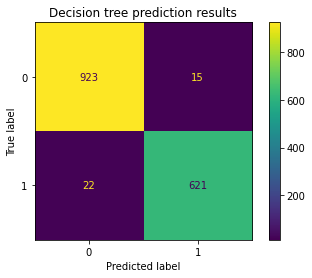

tp=621, fn=22, fp=15, tn=923
sensitivity=96.5785%, specificity=98.4009%
fpr=1.5991%, fnr=3.4215%


In [43]:
# classifier
decision_tree = DecisionTreeClassifier(random_state=2115)
decision_tree.fit(X_train, y_train)
y_prediction_decision_tree = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, y_test)
print(f'Decision tree score = {decision_tree_score}')

# confusion matrix
cm = confusion_matrix(y_test, y_prediction_decision_tree)
tn, fp, fn, tp = cm.ravel()
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title(label='Decision tree prediction results')
plt.show()

# prediction results
print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')
sensitivity_dt = round(100 * tp / (tp + fn), 4)
specificity_dt = round(100 * tn / (fp + tn), 4)
print(f'sensitivity={sensitivity_dt}%, specificity={specificity_dt}%')

fpr_dt = round(100 - specificity_dt, 4)
fnr_dt = round(100 - sensitivity_dt, 4)
print(f'fpr={fpr_dt}%, fnr={fnr_dt}%')

### Random Forest

Random forest score=0.9639468690702088


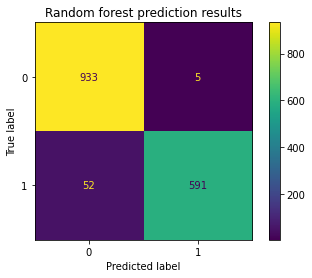

tp=591, fn=52, fp=5, tn=933
sensitivity=91.9129%, specificity=99.467%
fpr=0.533%, fnr=8.0871%


In [44]:
# classifier
rfc = RandomForestClassifier(max_depth=8, random_state=0)
rfc.fit(X_train, y_train)
y_prediction_rfc = rfc.predict(X_test)
rfc_score = rfc.score(X_test, y_test)
print(f'Random forest score={rfc_score}')

# confusion matrix
cm = confusion_matrix(y_test, y_prediction_rfc)
tn, fp, fn, tp = cm.ravel()
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title(label='Random forest prediction results')
plt.show()

# prediction results
print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')
sensitivity_rf = round(100 * tp / (tp + fn), 4)
specificity_rf = round(100 * tn / (fp + tn), 4)
print(f'sensitivity={sensitivity_rf}%, specificity={specificity_rf}%')

fpr_rf = round(100 - specificity_rf, 4)
fnr_rf = round(100 - sensitivity_rf, 4)
print(f'fpr={fpr_rf}%, fnr={fnr_rf}%')

### Logistic Regression

Logistic regression score = 0.9810246679316889


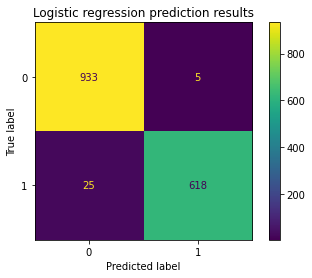

tp=618, fn=25, fp=5, tn=933
sensitivity=96.112%, specificity=99.467%
fpr=0.533%, fnr=3.888%


In [45]:
# classifier
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
y_prediction_lr = lr.predict(X_test)
lr_score = lr.score(X_test, y_test)
print(f'Logistic regression score = {lr_score}')

# confusion matrix
cm = confusion_matrix(y_test, y_prediction_lr)
tn, fp, fn, tp = cm.ravel()
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title(label='Logistic regression prediction results')
plt.show()

# results
print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')
sensitivity_lr = round(100 * tp / (tp+fn), 4)
specificity_lr = round(100 * tn / (fp+tn), 4)
print(f'sensitivity={sensitivity_lr}%, specificity={specificity_lr}%')

fpr_lr = round(100 - specificity_lr, 4)
fnr_lr = round(100 - sensitivity_lr, 4)
print(f'fpr={fpr_lr}%, fnr={fnr_lr}%')

### Conclusions

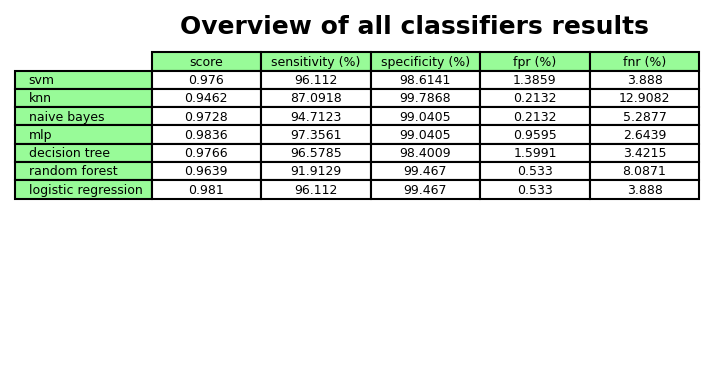

In [46]:
classifiers = ['svm', 'knn', 'naive bayes', 'mlp', 'decision tree', 'random forest', 'logistic regression']
results = ['score', 'sensitivity (%)', 'specificity (%)', 'fpr (%)', 'fnr (%)']
fig, ax = plt.subplots()
ax.set_axis_off()
table = ax.table(
    cellText = [[round(svm_score, 4), sensitivity_svm, specificity_svm, fpr_svm, fnr_svm], 
                [round(knn_score, 4), sensitivity_knn, specificity_knn, fpr_knn, fnr_knn],
                [round(gnb_score, 4), sensitivity_gnb, specificity_gnb, fpr_knn, fnr_gnb],
                [round(mlp_score, 4), sensitivity_mlp, specificity_mlp, fpr_mlp, fnr_mlp],
                [round(decision_tree_score, 4), sensitivity_dt, specificity_dt, fpr_dt, fnr_dt],
                [round(rfc_score, 4), sensitivity_rf, specificity_rf, fpr_rf, fnr_rf],
                [round(lr_score, 4), sensitivity_lr, specificity_lr, fpr_lr, fnr_lr],],  
    rowLabels = classifiers,  
    colLabels = results, 
    rowColours =["palegreen"] * 7,  
    colColours =["palegreen"] * 5, 
    cellLoc ='center',  
    loc ='upper left'
)
ax.set_title(f'Overview of all classifiers results', 
             fontweight ="bold") 
fig.tight_layout(pad=3.0)
fig.set_size_inches(6,3)
fig.set_dpi(150)

We compared 7 classifiers with default parameters:
* svm
* knn
* naive bayes
* mlp
* decision tree
* random forest
* logistic regression

Based on score accuracy, the best results come from Multi-layer Perceptron (MLP) - 0.9836. As we focus on false positive rate and false negative rate (required fpr <= 0.5%), the best result gives naive bayes classifier (fpr ~ 0.2132%, fnr ~ 5.2877%). In case we decided to accept also fpr ~ 0.533%, then logistic regression outputs lower fnr than naive bayes (fnr ~ 3.888).

In the next chapter we will focus on tuning MLP and Decision tree classifiers to achieve the best fpr and fnr for our problem.

# 2. Classifier parameters

### 2.1 MLP

### Hidden layers

Firstly we will test the influence of amount of hidden layers in MLP (starting from 1 layer to 20). By default each layer contains 100 neurons.

In [47]:
hidden_layers = [i for i in range(1, 21)]
score_hl_test = []
sensitivity_hl_test = []
specificity_hl_test = []
fpr_hl_test = []
fnr_hl_test = []

for layers in hidden_layers:
    print('*'*20)
    print(f'Hidden layers = {layers}')
    # mlp classifier
    mlp_hl_test = MLPClassifier(random_state=2115, max_iter=4000, hidden_layer_sizes=(100, ) * layers)
    mlp_hl_test.fit(X_train, y_train)
    y_prediction_mlp_hl_test = mlp_hl_test.predict(X_test)
    mlp_hl_test_score = mlp_hl_test.score(X_test, y_test)
    mlp_score_diff = mlp_hl_test_score - mlp_score
    score_hl_test.append(mlp_hl_test_score)
    print(f'Score={mlp_hl_test_score} ({mlp_score_diff:+})')

    # prediciton results
    tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_mlp_hl_test).ravel()
    print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')
    sensitivity_mlp_hl_test = round(100 * tp / (tp + fn), 4)
    specificity_mlp_hl_test = round(100 * tn / (fp + tn), 4)
    sensitivity_mlp_diff = round(sensitivity_mlp_hl_test- sensitivity_mlp, 4)
    specificity_mlp_diff = round(specificity_mlp_hl_test- specificity_mlp, 4)
    sensitivity_hl_test.append(sensitivity_mlp_hl_test)
    specificity_hl_test.append(specificity_mlp_hl_test)
    print(f'sensitivity={sensitivity_mlp_hl_test}% ({sensitivity_mlp_diff:+}%), specificity={specificity_mlp_hl_test}% ({specificity_mlp_diff:+}%)')
    
    fpr_mlp_hl_test = round(100 - specificity_mlp_hl_test, 4)
    fnr_mlp_hl_test  = round(100 - sensitivity_mlp_hl_test, 4)
    fpr_mlp_diff = round(fpr_mlp_hl_test - fpr_mlp, 4)
    fnr_mlp_diff = round(fnr_mlp_hl_test - fnr_mlp, 4)
    fpr_hl_test.append(fpr_mlp_hl_test)
    fnr_hl_test.append(fnr_mlp_hl_test)
    print(f'FPR={fpr_mlp_hl_test}% ({fpr_mlp_diff:+}%), FNR={fnr_mlp_hl_test}% ({fnr_mlp_diff:+}%)')
    print(' '*20)


********************
Hidden layers = 1
Score=0.9835547122074636 (+0.0)
tp=626, fn=17, fp=9, tn=929
sensitivity=97.3561% (+0.0%), specificity=99.0405% (+0.0%)
FPR=0.9595% (+0.0%), FNR=2.6439% (+0.0%)
                    
********************
Hidden layers = 2
Score=0.9829222011385199 (-0.0006325110689436864)
tp=626, fn=17, fp=10, tn=928
sensitivity=97.3561% (+0.0%), specificity=98.9339% (-0.1066%)
FPR=1.0661% (+0.1066%), FNR=2.6439% (+0.0%)
                    
********************
Hidden layers = 3
Score=0.9835547122074636 (+0.0)
tp=623, fn=20, fp=6, tn=932
sensitivity=96.8896% (-0.4665%), specificity=99.3603% (+0.3198%)
FPR=0.6397% (-0.3198%), FNR=3.1104% (+0.4665%)
                    
********************
Hidden layers = 4
Score=0.9829222011385199 (-0.0006325110689436864)
tp=626, fn=17, fp=10, tn=928
sensitivity=97.3561% (+0.0%), specificity=98.9339% (-0.1066%)
FPR=1.0661% (+0.1066%), FNR=2.6439% (+0.0%)
                    
********************
Hidden layers = 5
Score=0.98165717900

In [48]:
def annot_max(x,y, find_max=True, ax=None):
    if find_max:
      xminmax = x[np.argmax(y)]
      yminmax = y.max()
    else:
      xminmax = x[np.argmin(y)]
      yminmax = y.min()
    text= "x={:d}, y={:.3f}".format(xminmax, yminmax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xminmax, yminmax), xytext=(0.94,0.96), **kw)

In [49]:
def show_result(x, y, xlabel, ylabel, subplot, title='', show_max=True):
  plt.figure(figsize=(15, 9))
  plt.suptitle(title)
  plt.subplot(subplot)
  plt.plot(x, y)
  plt.xticks(x)
  plt.xlabel(xlabel, fontsize=14)
  plt.ylabel(ylabel, fontsize=14)
  annot_max(np.array(x),np.array(y), find_max=show_max)
  plt.show()

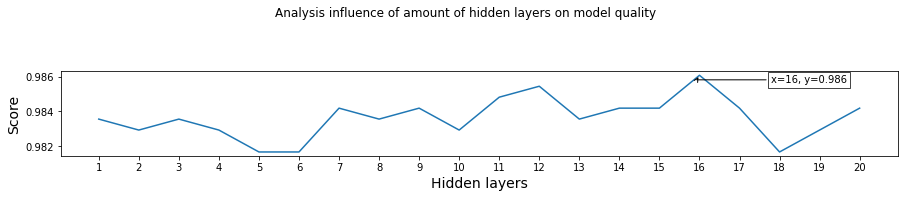

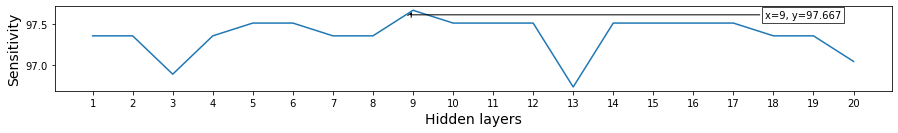

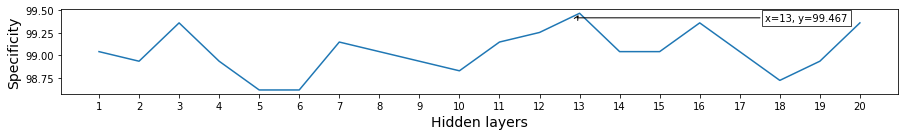

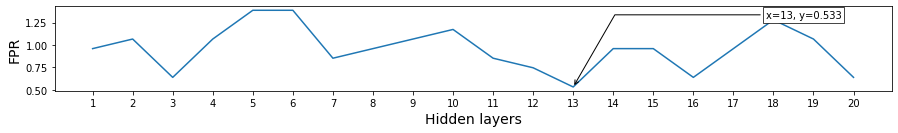

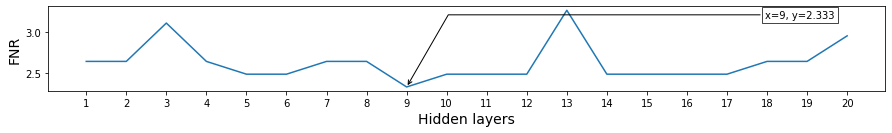

In [50]:
title = 'Analysis influence of amount of hidden layers on model quality'
xlabel = 'Hidden layers'
ylabel = 'Score'
show_result(hidden_layers, score_hl_test, xlabel, 'Score', 511, title=title, show_max=True)
show_result(hidden_layers, sensitivity_hl_test, xlabel, 'Sensitivity', 512, show_max=True)
show_result(hidden_layers, specificity_hl_test, xlabel, 'Specificity', 513, show_max=True)
show_result(hidden_layers, fpr_hl_test, xlabel, 'FPR', 514, show_max=False)
show_result(hidden_layers, fnr_hl_test, xlabel, 'FNR', 515, show_max=False)

Based on results, we can see that:
* max score = 0.986 for 16 hidden layers
* max sensitivity = 97.667% for 9 hidden layers
* max specificity = 99.467% for 13 hidden layers
* min fpr = 0.533% for 13 hidden layers
* min fnr = 2.333% for 9 hidden layers

We can see that for FPR = 0.533%, FNR reaches the highest value, but let's assume its still acceptable (3.2659%). Next tests (amount of neurons in each hidden layer) will be proceeded for 13 hidden layers.

* Hidden layers = 13
* Score=0.9835547122074636 (+0.0)
* tp=622, fn=21, fp=5, tn=933
* sensitivity=96.7341% (-0.622%), specificity=99.467% (+0.4265%)
* FPR=0.533% (-0.4265%), FNR=3.2659% (+0.622%)

In [51]:
current_mlp_score = score_hl_test[12]
current_mlp_sensitivity = sensitivity_hl_test[12]
current_mlp_specificity = specificity_hl_test[12]
current_mlp_fpr = fpr_hl_test[12]
current_mlp_fnr = fnr_hl_test[12]

### Neurons in each hidden layer

In [52]:
neurons = [8, 16, 32, 64, 100, 128, 256, 512]
layers = 13
score_neurons_test = []
sensitivity_neurons_test = []
specificity_neurons_test = []
fpr_neurons_test = []
fnr_neurons_test = []

for n in neurons:
    print('*'*20)
    print(f'Neurons = {n}')

    # mlp classifier
    mlp_neurons_test = MLPClassifier(random_state=2115, max_iter=4000, hidden_layer_sizes=(n, ) * layers)
    mlp_neurons_test.fit(X_train, y_train)
    y_prediction_mlp_neurons_test = mlp_neurons_test.predict(X_test)
    mlp_neurons_test_score = mlp_neurons_test.score(X_test, y_test)
    mlp_score_diff = mlp_neurons_test_score - current_mlp_score
    score_neurons_test.append(mlp_neurons_test_score)
    print(f'Score={mlp_neurons_test_score} ({mlp_score_diff:+})')

    # prediciton results
    tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_mlp_neurons_test).ravel()
    print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')
    sensitivity_mlp_neurons_test = round(100 * tp / (tp + fn), 4)
    specificity_mlp_neurons_test = round(100 * tn / (fp + tn), 4)
    sensitivity_mlp_diff = round(sensitivity_mlp_neurons_test- current_mlp_sensitivity, 4)
    specificity_mlp_diff = round(specificity_mlp_neurons_test- current_mlp_specificity, 4)
    sensitivity_neurons_test.append(sensitivity_mlp_neurons_test)
    specificity_neurons_test.append(specificity_mlp_neurons_test)
    print(f'sensitivity={sensitivity_mlp_neurons_test}% ({sensitivity_mlp_diff:+}%), specificity={specificity_mlp_neurons_test}% ({specificity_mlp_diff:+}%)')
    
    fpr_mlp_neurons_test = round(100 - specificity_mlp_neurons_test, 4)
    fnr_mlp_neurons_test  = round(100 - sensitivity_mlp_neurons_test, 4)
    fpr_mlp_diff = round(fpr_mlp_neurons_test - current_mlp_fpr, 4)
    fnr_mlp_diff = round(fnr_mlp_neurons_test - current_mlp_fnr, 4)
    fpr_neurons_test.append(fpr_mlp_neurons_test)
    fnr_neurons_test.append(fnr_mlp_neurons_test)
    print(f'FPR={fpr_mlp_neurons_test}% ({fpr_mlp_diff:+}%), FNR={fnr_mlp_neurons_test}% ({fnr_mlp_diff:+}%)')
    print(' '*20)

********************
Neurons = 8
Score=0.9803921568627451 (-0.003162555344718543)
tp=624, fn=19, fp=12, tn=926
sensitivity=97.0451% (+0.311%), specificity=98.7207% (-0.7463%)
FPR=1.2793% (+0.7463%), FNR=2.9549% (-0.311%)
                    
********************
Neurons = 16
Score=0.9810246679316889 (-0.0025300442757747454)
tp=623, fn=20, fp=10, tn=928
sensitivity=96.8896% (+0.1555%), specificity=98.9339% (-0.5331%)
FPR=1.0661% (+0.5331%), FNR=3.1104% (-0.1555%)
                    
********************
Neurons = 32
Score=0.9829222011385199 (-0.0006325110689436864)
tp=623, fn=20, fp=7, tn=931
sensitivity=96.8896% (+0.1555%), specificity=99.2537% (-0.2133%)
FPR=0.7463% (+0.2133%), FNR=3.1104% (-0.1555%)
                    
********************
Neurons = 64
Score=0.9829222011385199 (-0.0006325110689436864)
tp=623, fn=20, fp=7, tn=931
sensitivity=96.8896% (+0.1555%), specificity=99.2537% (-0.2133%)
FPR=0.7463% (+0.2133%), FNR=3.1104% (-0.1555%)
                    
********************
N

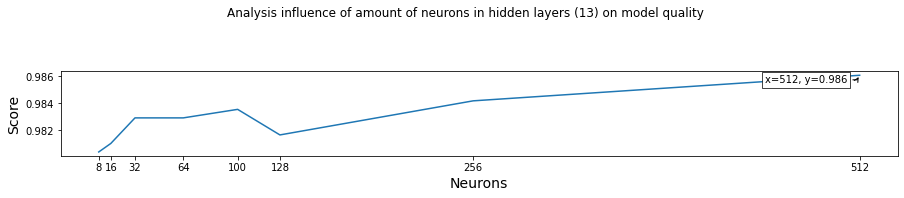

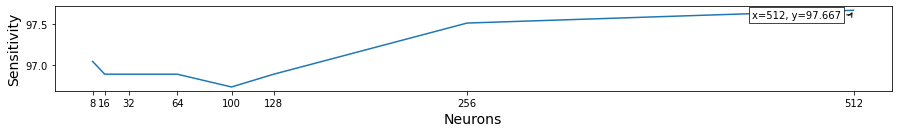

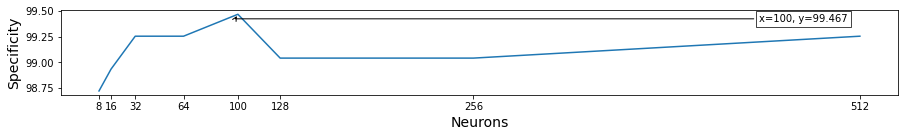

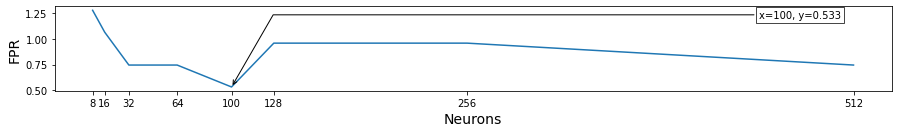

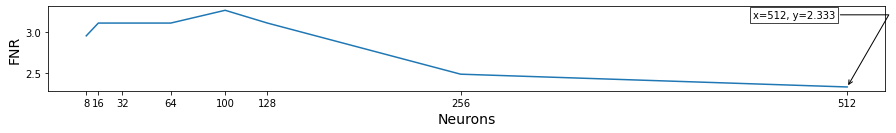

In [53]:
title = 'Analysis influence of amount of neurons in hidden layers (13) on model quality'
xlabel = 'Neurons'
ylabel = 'Score'
show_result(neurons, score_neurons_test, xlabel, 'Score', 511, title=title, show_max=True)
show_result(neurons, sensitivity_neurons_test, xlabel, 'Sensitivity', 512, show_max=True)
show_result(neurons, specificity_neurons_test, xlabel, 'Specificity', 513, show_max=True)
show_result(neurons, fpr_neurons_test, xlabel, 'FPR', 514, show_max=False)
show_result(neurons, fnr_neurons_test, xlabel, 'FNR', 515, show_max=False)

Studies don't give better results than the previous one, so we will leave model with 13 hidden layers and 100 neurons per layer.

### Weight optimization

By default MLP has solver 'adam'. 
The solver for weight optimization.
* ‘lbfgs’ is an optimizer in the family of quasi-Newton methods.
* ‘sgd’ refers to stochastic gradient descent.
* ‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba

Note: The default solver ‘adam’ works pretty well on relatively large datasets (with thousands of training samples or more) in terms of both training time and validation score. For small datasets, however, ‘lbfgs’ can converge faster and perform better.
(source: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [54]:
solvers = ['lbfgs', 'adam']
score_solver_test = []
sensitivity_solver_test = []
specificity_solver_test = []
fpr_solver_test = []
fnr_solver_test = []

for solver in solvers:
    print('*' * 20)
    print(f'Solver = {solver}')

    # classifier
    mlp_solver_test = MLPClassifier(random_state=2115, max_iter=4000, hidden_layer_sizes=(100, )*13 ,solver=solver)
    mlp_solver_test.fit(X_train, y_train)
    y_prediction_mlp_solver_test = mlp_solver_test.predict(X_test)
    mlp_solver_test_score = mlp_solver_test.score(X_test, y_test)
    mlp_solver_test_diff = mlp_solver_test_score - mlp_score
    score_solver_test.append(mlp_solver_test_score)
    print(f'Score with {solver} solver={mlp_solver_test_score} ({mlp_solver_test_diff:+})')

    tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_mlp_solver_test).ravel()
    print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')
    sensitivity_mlp_solver = round(100 * tp / (tp + fn), 4)
    specificity_mlp_solver = round(100 * tn / (fp + tn), 4)
    sensitivity_mlp_solver_diff = round(sensitivity_mlp_solver - current_mlp_sensitivity, 4)
    specificity_mlp_solver_diff = round(specificity_mlp_solver - current_mlp_specificity, 4)
    sensitivity_solver_test.append(sensitivity_mlp_solver)
    specificity_solver_test.append(specificity_mlp_solver)
    print("sensitivity={}% ({:+}%), specificity={}% ({:+}%)".format(sensitivity_mlp_solver, sensitivity_mlp_solver_diff , specificity_mlp_solver, specificity_mlp_solver_diff))

    fpr_mlp_solver = round(100 - specificity_mlp_solver, 4)
    fnr_mlp_solver = round(100 - sensitivity_mlp_solver, 4)
    fpr_mlp_solver_diff = round(fpr_mlp_solver - current_mlp_fpr, 4)
    fnr_mlp_solver_diff = round(fnr_mlp_solver - current_mlp_fnr, 4)
    fpr_solver_test.append(fpr_mlp_solver)
    fnr_solver_test.append(fnr_mlp_solver)
    print("lbfgs solver: FPR={}% ({:+}%), FNR={}% ({:+}%)".format(fpr_mlp_solver, fpr_mlp_solver_diff, fnr_mlp_solver, fnr_mlp_solver_diff))
    print(' ' * 20)

********************
Solver = lbfgs
Score with lbfgs solver=0.978494623655914 (-0.005060088551549602)
tp=623, fn=20, fp=14, tn=924
sensitivity=96.8896% (+0.1555%), specificity=98.5075% (-0.9595%)
lbfgs solver: FPR=1.4925% (+0.9595%), FNR=3.1104% (-0.1555%)
                    
********************
Solver = adam
Score with adam solver=0.9835547122074636 (+0.0)
tp=622, fn=21, fp=5, tn=933
sensitivity=96.7341% (+0.0%), specificity=99.467% (+0.0%)
lbfgs solver: FPR=0.533% (+0.0%), FNR=3.2659% (+0.0%)
                    


Solver lbfgs doesn't give any better results, so we will stay with Adam solver, which is a default one.

### 2.2 Decision tree

### Maximum depth
max_depth : int, default=None

The maximum depth of the tree. 
If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

In [55]:
max_depths = [i for i in range(1, 21)]
dt_md_test_score = []
dt_md_test_sensitivity = []
dt_md_test_specificity = []
dt_md_test_fpr = []
dt_md_test_fnr = [] 

for max_depth in max_depths:
    print('*' * 20)
    print(f'Max_depth = {max_depth}')

    # decision tree
    decision_tree_md_test = DecisionTreeClassifier(random_state=2115, max_depth=max_depth)
    decision_tree_md_test.fit(X_train, y_train)
    y_prediction_decision_tree_md_test = decision_tree_md_test.predict(X_test)
    decision_tree_score_md = decision_tree_md_test.score(X_test, y_test)
    decision_tree_score_diff = decision_tree_score_md - decision_tree_score
    dt_md_test_score.append(decision_tree_score_md)
    print(f'Score={decision_tree_score_md} ({decision_tree_score_diff:+})')

    # confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_decision_tree_md_test).ravel()
    print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')
    sensitivity_dt_md = round(100 * tp / (tp + fn), 4)
    specificity_dt_md = round(100 * tn / (fp + tn), 4)
    sensitivity_dt_diff = round(sensitivity_dt_md - sensitivity_dt, 4)
    specificity_dt_diff = round(specificity_dt_md - specificity_dt, 4)
    dt_md_test_sensitivity.append(sensitivity_dt_md)
    dt_md_test_specificity.append(specificity_dt_md)
    print("sensitivity={}% ({:+}%), specificity={}% ({:+}%)".format(sensitivity_dt_md, sensitivity_dt_diff, specificity_dt_md, specificity_dt_diff))

    fpr_dt_md = round(100 - specificity_dt_md, 4)
    fnr_dt_md = round(100 - sensitivity_dt_md, 4)
    fpr_dt_diff = round(fpr_dt_md - fpr_dt, 4)
    fnr_dt_diff = round(fnr_dt_md - fnr_dt, 4)
    dt_md_test_fpr.append(fpr_dt_md)
    dt_md_test_fnr.append(fnr_dt_diff)
    print("fpr={}% ({:+}%), fnr={}% ({:+}%)".format(fpr_dt_md, fpr_dt_diff, fnr_dt_md, fnr_dt_diff))

********************
Max_depth = 1
Score=0.8494623655913979 (-0.12713472485768496)
tp=501, fn=142, fp=96, tn=842
sensitivity=77.916% (-18.6625%), specificity=89.7655% (-8.6354%)
fpr=10.2345% (+8.6354%), fnr=22.084% (+18.6625%)
********************
Max_depth = 2
Score=0.9000632511068943 (-0.07653383934218849)
tp=581, fn=62, fp=96, tn=842
sensitivity=90.3577% (-6.2208%), specificity=89.7655% (-8.6354%)
fpr=10.2345% (+8.6354%), fnr=9.6423% (+6.2208%)
********************
Max_depth = 3
Score=0.9120809614168248 (-0.06451612903225801)
tp=602, fn=41, fp=98, tn=840
sensitivity=93.6236% (-2.9549%), specificity=89.5522% (-8.8487%)
fpr=10.4478% (+8.8487%), fnr=6.3764% (+2.9549%)
********************
Max_depth = 4
Score=0.9329538266919671 (-0.04364326375711569)
tp=539, fn=104, fp=2, tn=936
sensitivity=83.8258% (-12.7527%), specificity=99.7868% (+1.3859%)
fpr=0.2132% (-1.3859%), fnr=16.1742% (+12.7527%)
********************
Max_depth = 5
Score=0.9550917141049968 (-0.021505376344086002)
tp=575, fn=6

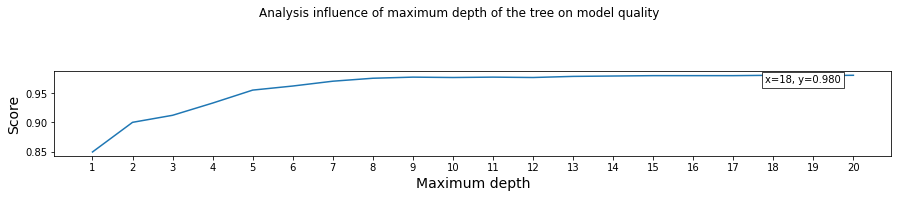

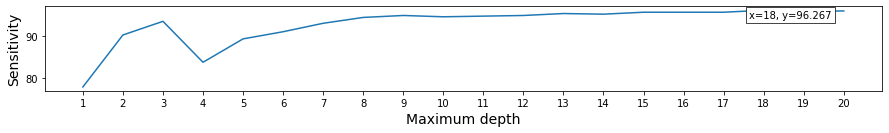

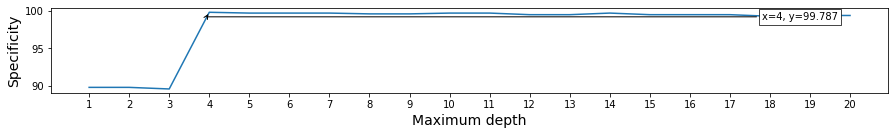

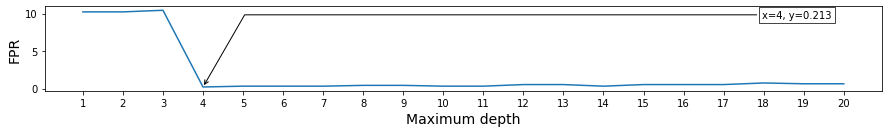

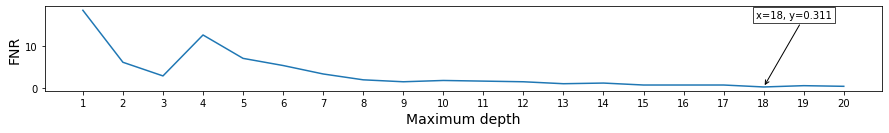

In [56]:
title = 'Analysis influence of maximum depth of the tree on model quality'
xlabel = 'Maximum depth'
show_result(max_depths, dt_md_test_score, xlabel, 'Score', 511, title=title, show_max=True)
show_result(max_depths, dt_md_test_sensitivity, xlabel, 'Sensitivity', 512, show_max=True)
show_result(max_depths, dt_md_test_specificity, xlabel, 'Specificity', 513, show_max=True)
show_result(max_depths, dt_md_test_fpr, xlabel, 'FPR', 514, show_max=False)
show_result(max_depths, dt_md_test_fnr, xlabel, 'FNR', 515, show_max=False)

Because we want to achieve FPR <= 0.5% but at the same time we don't want to increase FNR too much, from above tests the best result might be for max_depth = 10:

* Max_depth = 14
* Score=0.9791271347248577 (+0.0025300442757748565)
* tp=613, fn=30, fp=3, tn=935
* sensitivity=95.3344% (-1.2441%), specificity=99.6802% (+1.2793%)
* fpr=0.3198% (-1.2793%), fnr=4.6656% (+1.2441%)

FPR is reduced to 0.3198% (-1.279%), FNR increased to 4.6656% (+1.2441%). In result we reduced the amount of 'good' mails being classified as spam, but at the same time classifier accepts more spam than before. Next tests will be continued with max_depth = 14.

In [57]:
# save current best model
current_dt_score = dt_md_test_score[13]
current_dt_sensitivity = dt_md_test_sensitivity[13]
current_dt_specificity = dt_md_test_specificity[13]
current_dt_fpr = dt_md_test_fpr[13]
current_dt_fnr = dt_md_test_fnr[13]

### Min samples split
min_samples_split : int or float, default=2

The minimum number of samples required to split an internal node:

* If int, then consider min_samples_split as the minimum number.
* If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

********************
Min_samples_split = 2
Score=0.9791271347248577 (+0.0)
tp=613, fn=30, fp=3, tn=935
sensitivity=95.3344% (+0.0%), specificity=99.6802% (+0.0%)
fpr=0.3198% (+0.0%), fnr=4.6656% (+3.4215%)
********************
Min_samples_split = 3
Score=0.9791271347248577 (+0.0)
tp=613, fn=30, fp=3, tn=935
sensitivity=95.3344% (+0.0%), specificity=99.6802% (+0.0%)
fpr=0.3198% (+0.0%), fnr=4.6656% (+3.4215%)
********************
Min_samples_split = 4
Score=0.9797596457938014 (+0.0006325110689436864)
tp=615, fn=28, fp=4, tn=934
sensitivity=95.6454% (+0.311%), specificity=99.5736% (-0.1066%)
fpr=0.4264% (+0.1066%), fnr=4.3546% (+3.1105%)
********************
Min_samples_split = 5
Score=0.9803921568627451 (+0.0012650221378873727)
tp=617, fn=26, fp=5, tn=933
sensitivity=95.9565% (+0.6221%), specificity=99.467% (-0.2132%)
fpr=0.533% (+0.2132%), fnr=4.0435% (+2.7994%)
********************
Min_samples_split = 6
Score=0.9803921568627451 (+0.0012650221378873727)
tp=617, fn=26, fp=5, tn=933
sens

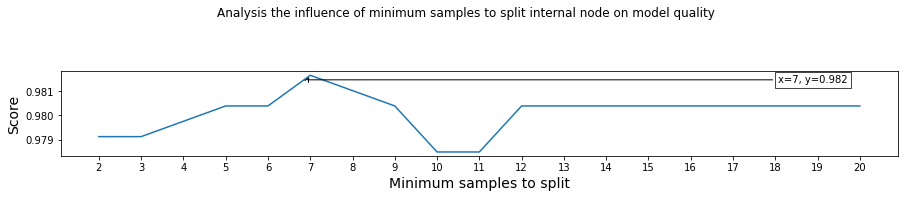

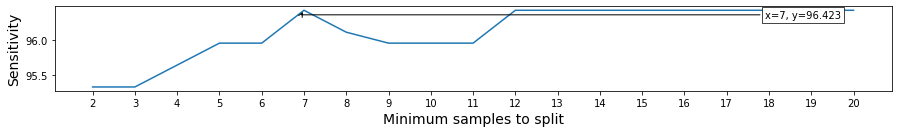

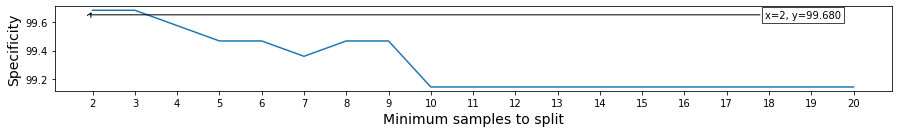

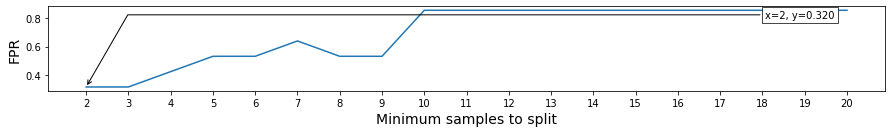

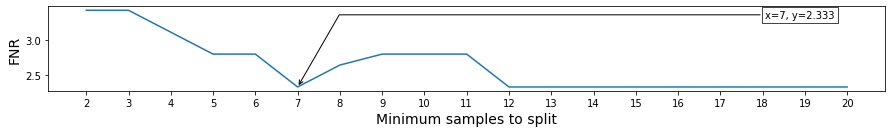

In [58]:
min_samples_splits = [i for i in range(2, 21)]
dt_ms_test_score = []
dt_ms_test_sensitivity = []
dt_ms_test_specificity = []
dt_ms_test_fpr = []
dt_ms_test_fnr = [] 

for min_samples_split in min_samples_splits:
    print('*' * 20)
    print(f'Min_samples_split = {min_samples_split}')

    # decision tree
    decision_tree_ms_test = DecisionTreeClassifier(random_state=2115, max_depth = 14, min_samples_split=min_samples_split)
    decision_tree_ms_test.fit(X_train, y_train)
    y_prediction_decision_tree_ms_test = decision_tree_ms_test.predict(X_test)
    decision_tree_score_ms = decision_tree_ms_test.score(X_test, y_test)
    decision_tree_score_diff = decision_tree_score_ms - current_dt_score
    dt_ms_test_score.append(decision_tree_score_ms)
    print(f'Score={decision_tree_score_ms} ({decision_tree_score_diff:+})')

    # confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_decision_tree_ms_test).ravel()
    print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')
    sensitivity_dt_ms = round(100 * tp / (tp + fn), 4)
    specificity_dt_ms = round(100 * tn / (fp + tn), 4)
    sensitivity_dt_diff = round(sensitivity_dt_ms - current_dt_sensitivity, 4)
    specificity_dt_diff = round(specificity_dt_ms - current_dt_specificity, 4)
    dt_ms_test_sensitivity.append(sensitivity_dt_ms)
    dt_ms_test_specificity.append(specificity_dt_ms)
    print("sensitivity={}% ({:+}%), specificity={}% ({:+}%)".format(sensitivity_dt_ms, sensitivity_dt_diff, specificity_dt_ms, specificity_dt_diff))

    fpr_dt_ms = round(100 - specificity_dt_ms, 4)
    fnr_dt_ms = round(100 - sensitivity_dt_ms, 4)
    fpr_dt_diff = round(fpr_dt_ms - current_dt_fpr, 4)
    fnr_dt_diff = round(fnr_dt_ms - current_dt_fnr, 4)
    dt_ms_test_fpr.append(fpr_dt_ms)
    dt_ms_test_fnr.append(fnr_dt_diff)
    print("fpr={}% ({:+}%), fnr={}% ({:+}%)".format(fpr_dt_ms, fpr_dt_diff, fnr_dt_ms, fnr_dt_diff))

# draw plots
title = 'Analysis the influence of minimum samples to split internal node on model quality'
xlabel = 'Minimum samples to split'
show_result(min_samples_splits, dt_ms_test_score, xlabel, 'Score', 511, title=title, show_max=True)
show_result(min_samples_splits, dt_ms_test_sensitivity, xlabel, 'Sensitivity', 512, show_max=True)
show_result(min_samples_splits, dt_ms_test_specificity, xlabel, 'Specificity', 513, show_max=True)
show_result(min_samples_splits, dt_ms_test_fpr, xlabel, 'FPR', 514, show_max=False)
show_result(min_samples_splits, dt_ms_test_fnr, xlabel, 'FNR', 515, show_max=False)

We didn't get any better results in terms of FPR. The greater the value of minimum_samples_split, the greater the value of FPR and the smaller the value of FNR.

# 3. Feature selection

### 3.1 RFE - Recursive feature elimination
Feature ranking with recursive feature elimination.

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute or callable. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [59]:
# data size
print(data_frame.shape)

(4789, 463)


RFE with Decision tree

********************
n_features=20
Score=0.9803921568627451 (+0.003795066413662229)
tp=616, fn=27, fp=4, tn=934
sensitivity=95.8009% (-0.7776%), specificity=99.5736% (+1.1727%)
FPR=0.4264% (-1.1727%), FNR=4.1991% (+0.7776%)
                    
********************
n_features=50
Score=0.9797596457938014 (+0.003162555344718543)
tp=621, fn=22, fp=10, tn=928
sensitivity=96.5785% (+0.0%), specificity=98.9339% (+0.533%)
FPR=1.0661% (-0.533%), FNR=3.4215% (+0.0%)
                    
********************
n_features=70
Score=0.9746995572422518 (-0.001897533206831059)
tp=622, fn=21, fp=19, tn=919
sensitivity=96.7341% (+0.1556%), specificity=97.9744% (-0.4265%)
FPR=2.0256% (+0.4265%), FNR=3.2659% (-0.1556%)
                    
********************
n_features=100
Score=0.9765970904490828 (+0.0)
tp=620, fn=23, fp=14, tn=924
sensitivity=96.423% (-0.1555%), specificity=98.5075% (+0.1066%)
FPR=1.4925% (-0.1066%), FNR=3.577% (+0.1555%)
                    
********************
n_features=125
Score=0

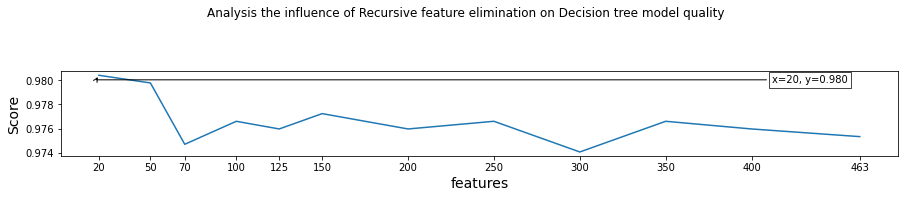

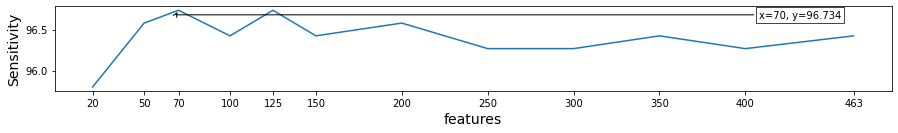

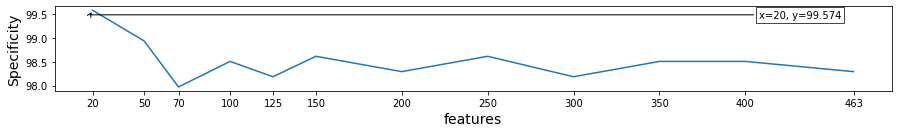

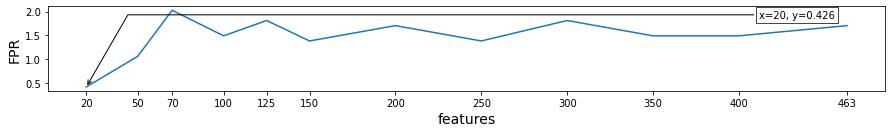

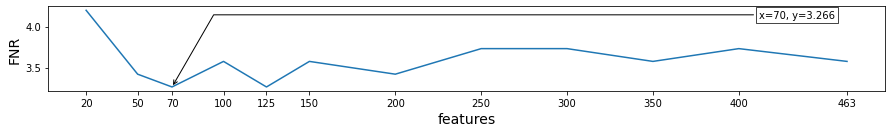

In [60]:
# take 200 most informative features
n_features_list = [20, 50, 70, 100, 125, 150, 200, 250, 300, 350, 400, 463]
dt_nf_test_scores = []
dt_nf_test_sensitivities = []
dt_nf_test_specificities = []
dt_nf_test_fprs = []
ft_nf_test_fnrs = []

for n_features in n_features_list:
    print('*' * 20)
    print(f'n_features={n_features}')
    
    # decision tree
    decision_tree_with_rfe = DecisionTreeClassifier()
    rfe = RFE(estimator=decision_tree_with_rfe, n_features_to_select=n_features, step=10)
    rfe = rfe.fit(X_train, y_train)
    y_prediction_rfe = rfe.predict(X_test)
    decision_tree_with_rfe_score = rfe.score(X_test, y_test)
    decision_tree_score_diff = decision_tree_with_rfe_score - decision_tree_score
    dt_nf_test_scores.append(decision_tree_with_rfe_score)
    print(f'Score={decision_tree_with_rfe_score} ({decision_tree_score_diff:+})')

    # confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_rfe).ravel()
    print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')
    sensitivity_dt_rfe = round(100 * tp / (tp + fn), 4)
    specificity_dt_rfe = round(100 * tn / (fp + tn), 4)
    sensitivity_dt_diff = round(sensitivity_dt_rfe - sensitivity_dt, 4)
    specificity_dt_diff = round(specificity_dt_rfe - specificity_dt, 4)
    dt_nf_test_sensitivities.append(sensitivity_dt_rfe)
    dt_nf_test_specificities.append(specificity_dt_rfe)
    print("sensitivity={}% ({:+}%), specificity={}% ({:+}%)".format(sensitivity_dt_rfe, sensitivity_dt_diff, specificity_dt_rfe, specificity_dt_diff))

    fpr_dt_rfe = round(100 - specificity_dt_rfe, 4)
    fnr_dt_rfe = round(100 - sensitivity_dt_rfe, 4)
    fpr_dt_diff = round(fpr_dt_rfe - fpr_dt, 4)
    fnr_dt_diff = round(fnr_dt_rfe - fnr_dt, 4)
    dt_nf_test_fprs.append(fpr_dt_rfe)
    ft_nf_test_fnrs.append(fnr_dt_rfe)
    print("FPR={}% ({:+}%), FNR={}% ({:+}%)".format(fpr_dt_rfe, fpr_dt_diff, fnr_dt_rfe, fnr_dt_diff))
    print(' ' * 20)

# draw plots
title = 'Analysis the influence of Recursive feature elimination on Decision tree model quality'
xlabel = 'features'
show_result(n_features_list, dt_nf_test_scores, xlabel, 'Score', 511, title=title, show_max=True)
show_result(n_features_list, dt_nf_test_sensitivities, xlabel, 'Sensitivity', 512, show_max=True)
show_result(n_features_list, dt_nf_test_specificities, xlabel, 'Specificity', 513, show_max=True)
show_result(n_features_list, dt_nf_test_fprs, xlabel, 'FPR', 514, show_max=False)
show_result(n_features_list, ft_nf_test_fnrs, xlabel, 'FNR', 515, show_max=False)

For n_features = 20 decision tree classifier gives the best FPR result = 0.533% and FNR = 4.1991%. The best FNR is 3.266% for 70 features, but FPR is to high (1.7058%). Taking this into consideration we can assume the best result is for 20 features.

* n_features=20
* Score=0.9797596457938014 (+0.003162555344718543)
* tp=616, fn=27, fp=5, tn=933
* sensitivity=95.8009% (-0.7776%), specificity=99.467% (+1.0661%)
* FPR=0.533% (-1.0661%), FNR=4.1991% (+0.7776%)

### 3.2 Univariate feature selection - SelectKBest

SelectKBest with MLP

********************
Best features=20
Score=0.9709044908285895 (-0.01265022137887406)
tp=604, fn=39, fp=7, tn=931
sensitivity=93.9347% (-3.4214%), specificity=99.2537% (+0.2132%)
fpr=0.7463% (-0.2132%), fnr=6.0653% (+3.4214%)
                    
********************
Best features=50
Score=0.9797596457938014 (-0.003795066413662229)
tp=620, fn=23, fp=9, tn=929
sensitivity=96.423% (-0.9331%), specificity=99.0405% (+0.0%)
fpr=0.9595% (+0.0%), fnr=3.577% (+0.9331%)
                    
********************
Best features=70
Score=0.9816571790006325 (-0.001897533206831059)
tp=620, fn=23, fp=6, tn=932
sensitivity=96.423% (-0.9331%), specificity=99.3603% (+0.3198%)
fpr=0.6397% (-0.3198%), fnr=3.577% (+0.9331%)
                    
********************
Best features=100
Score=0.9822896900695762 (-0.0012650221378873727)
tp=622, fn=21, fp=7, tn=931
sensitivity=96.7341% (-0.622%), specificity=99.2537% (+0.2132%)
fpr=0.7463% (-0.2132%), fnr=3.2659% (+0.622%)
                    
*******************

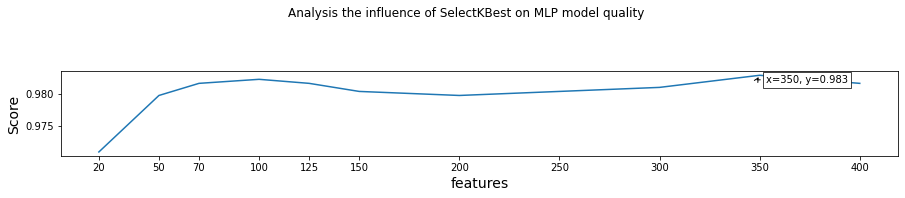

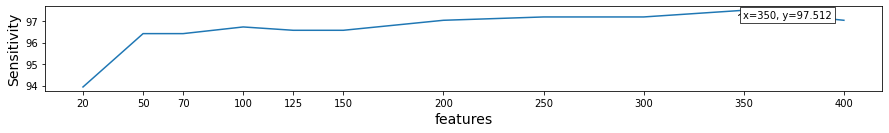

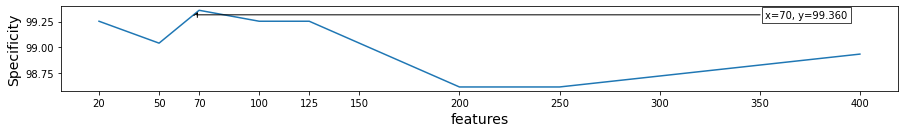

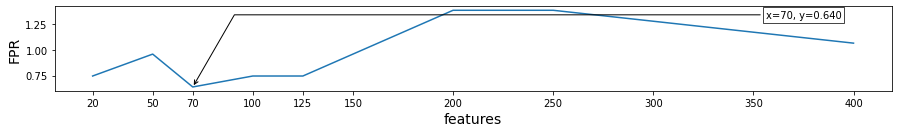

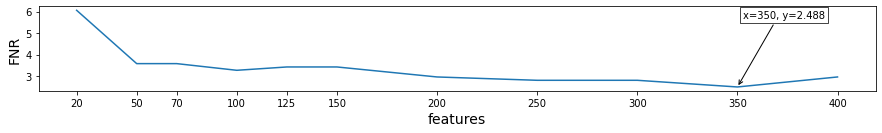

In [61]:
n_features_list = [20, 50, 70, 100, 125, 150, 200, 250, 300, 350, 400]
mlp_skb_test_scores = []
mlp_skb_test_sensitivities = []
mlp_skb_test_specificities = []
mlp_skb_test_fprs = []
mlp_skb_test_fnrs = []

for best_features in n_features_list:
    print('*' * 20)
    print(f'Best features={best_features}')
    selector = SelectKBest(chi2, k=best_features)
    X_train_skb = selector.fit_transform(X_train, y_train) # fit only on train set!
    X_test_skb = selector.transform(X_test)

    # mlp classifier
    mlp_skb = MLPClassifier(random_state=2115, max_iter=4000, solver='adam', hidden_layer_sizes=(100,))
    mlp_skb.fit(X_train_skb, y_train)
    y_prediction_mlp_skb = mlp_skb.predict(X_test_skb)
    mlp_skb_score = mlp_skb.score(X_test_skb, y_test)

    # compare score with default
    mlp_skb_diff = mlp_skb_score - mlp_score
    mlp_skb_test_scores.append(mlp_skb_score)
    print(f'Score={mlp_skb_score} ({mlp_skb_diff:+})')

    # confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_mlp_skb).ravel()
    print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')
    sensitivity_mlp_skb = round(100 * tp / (tp + fn), 4)
    specificity_mlp_skb = round(100 * tn / (fp + tn), 4)
    mlp_skb_test_sensitivities.append(sensitivity_mlp_skb)
    mlp_skb_test_specificities.append(specificity_mlp_skb)
    
    # compare with default
    sensitivity_mlp_diff = round(sensitivity_mlp_skb-sensitivity_mlp, 4)
    specificity_mlp_diff = round(specificity_mlp_skb-specificity_mlp, 4)
    print("sensitivity={}% ({:+}%), specificity={}% ({:+}%)".format(sensitivity_mlp_skb, sensitivity_mlp_diff, specificity_mlp_skb, specificity_mlp_diff))

    # fpr and fnr
    fpr_mlp_skb = round(100 - specificity_mlp_skb, 4)
    fnr_mlp_skb = round(100 - sensitivity_mlp_skb, 4)
    mlp_skb_test_fprs.append(fpr_mlp_skb)
    mlp_skb_test_fnrs.append(fnr_mlp_skb)
    fpr_mlp_skb_diff = round(fpr_mlp_skb - fpr_mlp, 4)
    fnr_mlp_skb_diff = round(fnr_mlp_skb - fnr_mlp, 4)
    print("fpr={}% ({:+}%), fnr={}% ({:+}%)".format(fpr_mlp_skb, fpr_mlp_skb_diff, fnr_mlp_skb, fnr_mlp_skb_diff))
    print(' ' * 20)

# draw plots
title = 'Analysis the influence of SelectKBest on MLP model quality'
xlabel = 'features'
show_result(n_features_list, mlp_skb_test_scores, xlabel, 'Score', 511, title=title, show_max=True)
show_result(n_features_list, mlp_skb_test_sensitivities, xlabel, 'Sensitivity', 512, show_max=True)
show_result(n_features_list, mlp_skb_test_specificities, xlabel, 'Specificity', 513, show_max=True)
show_result(n_features_list, mlp_skb_test_fprs, xlabel, 'FPR', 514, show_max=False)
show_result(n_features_list, mlp_skb_test_fnrs, xlabel, 'FNR', 515, show_max=False)

Best results for selecting 70 features. FPR has been reduced to 0.6397% (less than 0.5%), at the same time FNR was increased by +0.9331% making it to 3.577% . We accept more spam (sensitivity is lower = 96.423%) but we take more valid mails (specificity = 99.3603%).

* Best features=70
* Score=0.9816571790006325 (-0.001897533206831059)
* tp=620, fn=23, fp=6, tn=932
* sensitivity=96.423 (-0.9331), specificity=99.3603 (+0.3198)
* fpr=0.6397% (-0.3198%), fnr=3.577% (+0.9331%)

SelectKBest with DecisionTree

********************
Best features=20
Score=0.9671094244149273 (-0.009487666034155517)
tp=599, fn=44, fp=8, tn=930
sensitivity=93.1571% (-3.4214%), specificity=99.1471% (+0.7462%)
FPR=0.8529% (-0.7462%), FNR=6.8429% (+3.4214%)
                    
********************
Best features=50
Score=0.9715370018975332 (-0.005060088551549602)
tp=607, fn=36, fp=9, tn=929
sensitivity=94.4012% (-2.1773%), specificity=99.0405% (+0.6396%)
FPR=0.9595% (-0.6396%), FNR=5.5988% (+2.1773%)
                    
********************
Best features=70
Score=0.9765970904490828 (+0.0)
tp=612, fn=31, fp=6, tn=932
sensitivity=95.1788% (-1.3997%), specificity=99.3603% (+0.9594%)
FPR=0.6397% (-0.9594%), FNR=4.8212% (+1.3997%)
                    
********************
Best features=100
Score=0.9721695129664769 (-0.0044275774826059155)
tp=609, fn=34, fp=10, tn=928
sensitivity=94.7123% (-1.8662%), specificity=98.9339% (+0.533%)
FPR=1.0661% (-0.533%), FNR=5.2877% (+1.8662%)
                    
********************
Bes

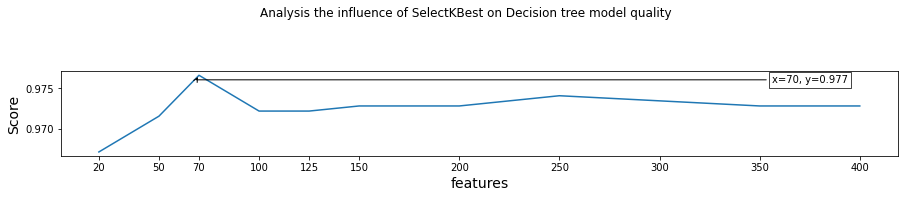

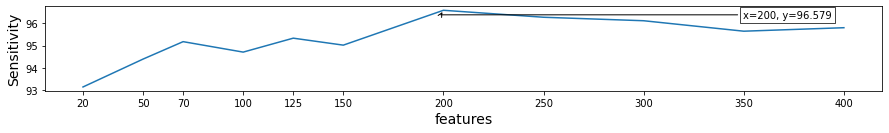

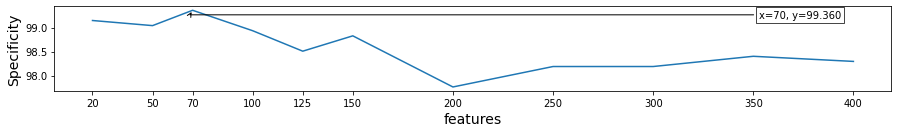

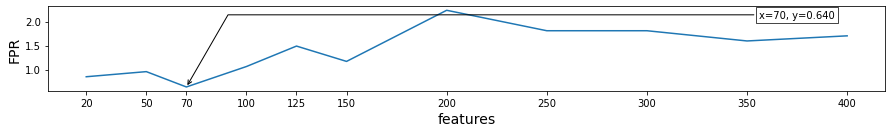

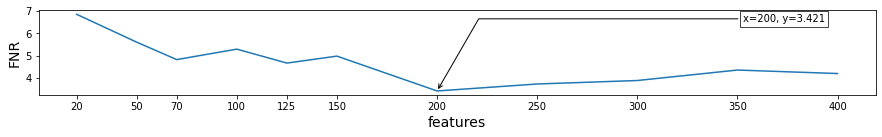

In [62]:
n_features_list = [20, 50, 70, 100, 125, 150, 200, 250, 300, 350, 400]
dt_skb_test_scores = []
dt_skb_test_sensitivities = []
dt_skb_test_specificities = []
dt_skb_test_fprs = []
dt_skb_test_fnrs = []

for best_features in n_features_list:
    print('*' * 20)
    print(f'Best features={best_features}')
    selector = SelectKBest(chi2, k=best_features)
    X_train_skb = selector.fit_transform(X_train, y_train) # fit only on train set!
    X_test_skb = selector.transform(X_test)

    # decision tree classifier
    dt_skb = DecisionTreeClassifier()
    dt_skb.fit(X_train_skb, y_train)
    y_prediction_dt_skb = dt_skb.predict(X_test_skb)
    dt_skb_score = dt_skb.score(X_test_skb, y_test)

    # compare score with default
    dt_skb_diff = dt_skb_score - decision_tree_score
    dt_skb_test_scores.append(dt_skb_score)
    print(f'Score={dt_skb_score} ({dt_skb_diff:+})')

    # confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_dt_skb).ravel()
    print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')
    sensitivity_dt_skb = round(100 * tp / (tp + fn), 4)
    specificity_dt_skb = round(100 * tn / (fp + tn), 4)
    dt_skb_test_sensitivities.append(sensitivity_dt_skb)
    dt_skb_test_specificities.append(specificity_dt_skb)
    
    # compare with default
    sensitivity_dt_diff = round(sensitivity_dt_skb-sensitivity_dt, 4)
    specificity_dt_diff = round(specificity_dt_skb-specificity_dt, 4)
    print("sensitivity={}% ({:+}%), specificity={}% ({:+}%)".format(sensitivity_dt_skb, sensitivity_dt_diff, specificity_dt_skb, specificity_dt_diff))

    # fpr and fnr
    fpr_dt_skb = round(100 - specificity_dt_skb, 4)
    fnr_dt_skb = round(100 - sensitivity_dt_skb, 4)
    dt_skb_test_fprs.append(fpr_dt_skb)
    dt_skb_test_fnrs.append(fnr_dt_skb)
    fpr_dt_skb_diff = round(fpr_dt_skb - fpr_dt, 4)
    fnr_dt_skb_diff = round(fnr_dt_skb - fnr_dt, 4)
    print("FPR={}% ({:+}%), FNR={}% ({:+}%)".format(fpr_dt_skb, fpr_dt_skb_diff, fnr_dt_skb, fnr_dt_skb_diff))
    print(' ' * 20)

# draw plots
title = 'Analysis the influence of SelectKBest on Decision tree model quality'
xlabel = 'features'
show_result(n_features_list, dt_skb_test_scores, xlabel, 'Score', 511, title=title, show_max=True)
show_result(n_features_list, dt_skb_test_sensitivities, xlabel, 'Sensitivity', 512, show_max=True)
show_result(n_features_list, dt_skb_test_specificities, xlabel, 'Specificity', 513, show_max=True)
show_result(n_features_list, dt_skb_test_fprs, xlabel, 'FPR', 514, show_max=False)
show_result(n_features_list, dt_skb_test_fnrs, xlabel, 'FNR', 515, show_max=False)

We got the best results for 70 best features, same as for MLP classifier.

* Best features=70
* Score=0.9772296015180265 (+0.0006325110689436864)
* tp=613, fn=30, fp=6, tn=932
* sensitivity=95.3344% (-1.2441%), specificity=99.3603% (+0.9594%)
* FPR=0.6397% (-0.9594%), FNR=4.6656% (+1.2441%)

### 3.3 PCA

Principal component analysis (PCA).

Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD.

PCA with MLP:

********************
Components=20
Score=0.9810246679316889 (-0.0025300442757747454)
tp=620, fn=23, fp=7, tn=931
sensitivity=96.423% (-0.9331%), specificity=99.2537% (+0.2132%)
FPR=0.7463% (-0.2132%), FNR=3.577% (+0.9331%)
                    
********************
Components=50
Score=0.9822896900695762 (-0.0012650221378873727)
tp=622, fn=21, fp=7, tn=931
sensitivity=96.7341% (-0.622%), specificity=99.2537% (+0.2132%)
FPR=0.7463% (-0.2132%), FNR=3.2659% (+0.622%)
                    
********************
Components=70
Score=0.9867172675521821 (+0.003162555344718543)
tp=625, fn=18, fp=3, tn=935
sensitivity=97.2006% (-0.1555%), specificity=99.6802% (+0.6397%)
FPR=0.3198% (-0.6397%), FNR=2.7994% (+0.1555%)
                    
********************
Components=100
Score=0.9841872232764073 (+0.0006325110689436864)
tp=623, fn=20, fp=5, tn=933
sensitivity=96.8896% (-0.4665%), specificity=99.467% (+0.4265%)
FPR=0.533% (-0.4265%), FNR=3.1104% (+0.4665%)
                    
********************
C

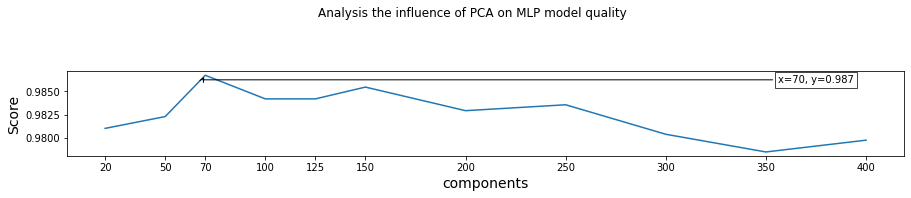

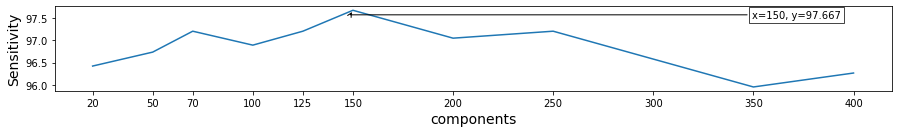

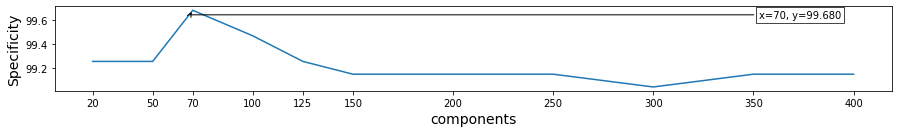

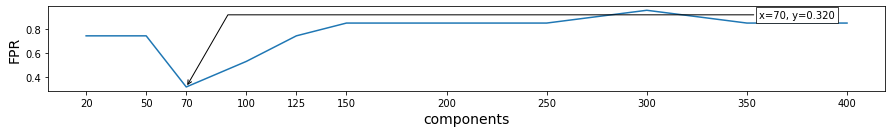

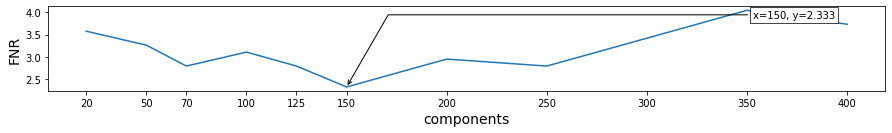

In [63]:
components_list = [20, 50, 70, 100, 125, 150, 200, 250, 300, 350, 400]
mlp_pca_test_scores = []
mlp_pca_test_sensitivities = []
mlp_pca_test_specificities = []
mlp_pca_test_fprs = []
mlp_pca_test_fnrs = []

for components in components_list:
    print('*'*20)
    print(f'Components={components}')
    pca = PCA(n_components=components).fit(X_train) # fit only on train set

    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)

    # mlp
    mlp_pca = MLPClassifier(random_state=2115, max_iter=4000, solver='adam', hidden_layer_sizes=(100,))
    mlp_pca.fit(X_train_pca, y_train)
    y_prediction_mlp_pca = mlp_pca.predict(X_test_pca)
    mlp_pca_score = mlp_pca.score(X_test_pca, y_test)
    mlp_pca_test_scores.append(mlp_pca_score)

    # compare with default
    mlp_pca_score_diff = mlp_pca_score - mlp_score
    print(f'Score={mlp_pca_score} ({mlp_pca_score_diff:+})')

    # confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_mlp_pca).ravel()
    print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')
    sensitivity_mlp_pca = round(100 * tp / (tp + fn), 4)
    specificity_mlp_pca = round(100 * tn / (fp + tn), 4)
    mlp_pca_test_sensitivities.append(sensitivity_mlp_pca)
    mlp_pca_test_specificities.append(specificity_mlp_pca)
    sensitivity_mlp_diff = round(sensitivity_mlp_pca - sensitivity_mlp, 4)
    specificity_mlp_diff = round(specificity_mlp_pca - specificity_mlp, 4)
    print("sensitivity={}% ({:+}%), specificity={}% ({:+}%)".format(sensitivity_mlp_pca, sensitivity_mlp_diff, specificity_mlp_pca, specificity_mlp_diff))

    # fpr and fnr
    fpr_mlp_pca = round(100 - specificity_mlp_pca, 4)
    fnr_mlp_pca = round(100 - sensitivity_mlp_pca, 4)
    mlp_pca_test_fprs.append(fpr_mlp_pca)
    mlp_pca_test_fnrs.append(fnr_mlp_pca)
    fpr_mlp_diff = round(fpr_mlp_pca - fpr_mlp, 4)
    fnr_mlp_diff = round(fnr_mlp_pca - fnr_mlp, 4)
    print("FPR={}% ({:+}%), FNR={}% ({:+}%)".format(fpr_mlp_pca, fpr_mlp_diff, fnr_mlp_pca, fnr_mlp_diff))
    print(' ' * 20)

# draw plots
title = 'Analysis the influence of PCA on MLP model quality'
xlabel = 'components'
show_result(components_list, mlp_pca_test_scores, xlabel, 'Score', 511, title=title, show_max=True)
show_result(components_list, mlp_pca_test_sensitivities, xlabel, 'Sensitivity', 512, show_max=True)
show_result(components_list, mlp_pca_test_specificities, xlabel, 'Specificity', 513, show_max=True)
show_result(components_list, mlp_pca_test_fprs, xlabel, 'FPR', 514, show_max=False)
show_result(components_list, mlp_pca_test_fnrs, xlabel, 'FNR', 515, show_max=False)

PCA with MLP returns the best FPR=0.533% for n_components = 50 and n_components = 100, But for 100 components FNR is slightly lower. Comparision of these two results are presented below. 

Good result:
* Components=50
* Score=0.9829222011385199 (-0.0006325110689436864)
* tp=621, fn=22, fp=5, tn=933
* sensitivity=96.5785% (-0.7776%), specificity=99.467% (+0.4265%)
* FPR=0.533% (-0.4265%), FNR=3.4215% (+0.7776%)

Better balanced result in terms of FNR:

* Components=100
* Score=0.9841872232764073 (+0.0006325110689436864)
* tp=623, fn=20, fp=5, tn=933
* sensitivity=96.8896% (-0.4665%), specificity=99.467% (+0.4265%)
* FPR=0.533% (-0.4265%), FNR=3.1104% (+0.4665%)

PCA with Decision tree

********************
Components=20
Score=0.9715370018975332 (-0.005060088551549602)
tp=619, fn=24, fp=21, tn=917
sensitivity=96.2675% (-0.311%), specificity=97.7612% (-0.6397%)
FPR=2.2388% (+0.6397%), FNR=3.7325% (+0.311%)
                    
********************
Components=50
Score=0.9683744465528147 (-0.008222643896268145)
tp=618, fn=25, fp=25, tn=913
sensitivity=96.112% (-0.4665%), specificity=97.3348% (-1.0661%)
FPR=2.6652% (+1.0661%), FNR=3.888% (+0.4665%)
                    
********************
Components=70
Score=0.9652118912080961 (-0.011385199240986688)
tp=614, fn=29, fp=26, tn=912
sensitivity=95.4899% (-1.0886%), specificity=97.2281% (-1.1728%)
FPR=2.7719% (+1.1728%), FNR=4.5101% (+1.0886%)
                    
********************
Components=100
Score=0.9645793801391525 (-0.012017710309930374)
tp=614, fn=29, fp=27, tn=911
sensitivity=95.4899% (-1.0886%), specificity=97.1215% (-1.2794%)
FPR=2.8785% (+1.2794%), FNR=4.5101% (+1.0886%)
                    
*******************

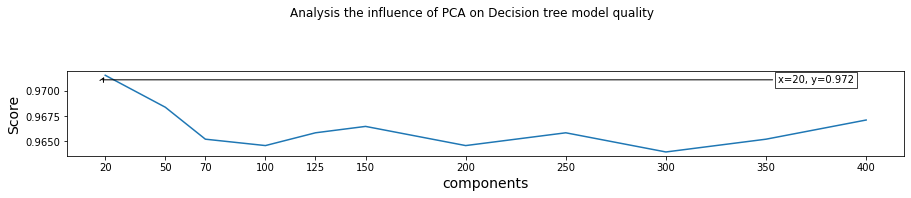

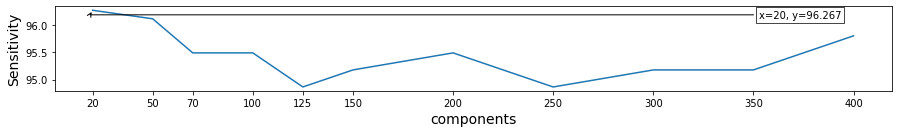

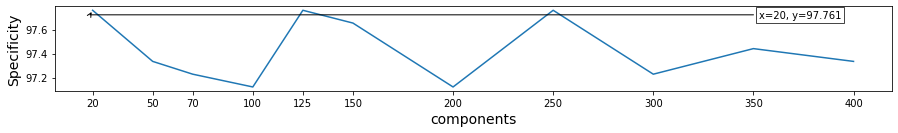

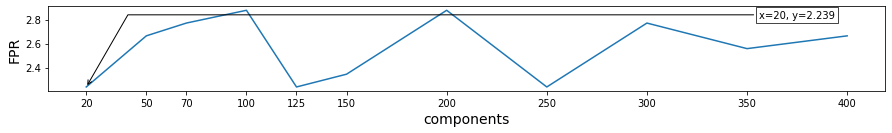

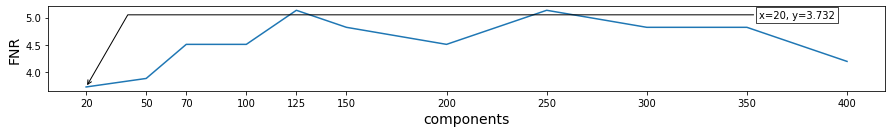

In [64]:
components_list = [20, 50, 70, 100, 125, 150, 200, 250, 300, 350, 400]
dt_pca_test_scores = []
dt_pca_test_sensitivities = []
dt_pca_test_specificities = []
dt_pca_test_fprs = []
dt_pca_test_fnrs = []

for components in components_list:
    print('*' * 20)
    print(f'Components={components}')
    pca = PCA(n_components=components).fit(X_train) # fit only on train set
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)

    # decision tree classifier
    dt_pca = DecisionTreeClassifier()
    dt_pca.fit(X_train_pca, y_train)
    y_prediction_dt_pca = dt_pca.predict(X_test_pca)
    dt_pca_score = dt_pca.score(X_test_pca, y_test)
    dt_pca_test_scores.append(dt_pca_score)

    # compare with default
    dt_pca_score_diff = dt_pca_score - decision_tree_score
    print(f'Score={dt_pca_score} ({dt_pca_score_diff:+})')

    # confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_dt_pca).ravel()
    print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')
    sensitivity_dt_pca = round(100 * tp / (tp + fn), 4)
    specificity_dt_pca = round(100 * tn / (fp + tn), 4)
    dt_pca_test_sensitivities.append(sensitivity_dt_pca)
    dt_pca_test_specificities.append(specificity_dt_pca)
    sensitivity_dt_diff = round(sensitivity_dt_pca - sensitivity_dt, 4)
    specificity_dt_diff = round(specificity_dt_pca - specificity_dt, 4)
    print("sensitivity={}% ({:+}%), specificity={}% ({:+}%)".format(sensitivity_dt_pca, sensitivity_dt_diff, specificity_dt_pca, specificity_dt_diff))

    # fpr and fnr
    fpr_dt_pca = round(100 - specificity_dt_pca, 4)
    fnr_dt_pca = round(100 - sensitivity_dt_pca, 4)
    dt_pca_test_fprs.append(fpr_dt_pca)
    dt_pca_test_fnrs.append(fnr_dt_pca)
    fpr_dt_diff = round(fpr_dt_pca - fpr_dt, 4)
    fnr_dt_diff = round(fnr_dt_pca - fnr_dt, 4)
    print("FPR={}% ({:+}%), FNR={}% ({:+}%)".format(fpr_dt_pca, fpr_dt_diff, fnr_dt_pca, fnr_dt_diff))
    print(' ' * 20)

# draw plots
title = 'Analysis the influence of PCA on Decision tree model quality'
xlabel = 'components'
show_result(components_list, dt_pca_test_scores, xlabel, 'Score', 511, title=title, show_max=True)
show_result(components_list, dt_pca_test_sensitivities, xlabel, 'Sensitivity', 512, show_max=True)
show_result(components_list, dt_pca_test_specificities, xlabel, 'Specificity', 513, show_max=True)
show_result(components_list, dt_pca_test_fprs, xlabel, 'FPR', 514, show_max=False)
show_result(components_list, dt_pca_test_fnrs, xlabel, 'FNR', 515, show_max=False)

PCA with Decision tree gives much worse results, so we won't focus on them.

# 4. Methods for class-imbalanced problems

### 4.1 SMOTE

Class to perform over-sampling using SMOTE - Synthetic Minority over-sampling

In [65]:
print(f'Original train dataset shape: {Counter(y_train)}')

Original train dataset shape: Counter({'no': 2011, 'yes': 1197})


We see that originally train set contains more non spam data. SMOTE algorithm will add spam samples to train set.

In [66]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print(f'Resampled train dataset shape: {Counter(y_train_res)}')

Resampled train dataset shape: Counter({'yes': 2011, 'no': 2011})


Now let's see how it affects sensitivity and specificity on MLP and DecisionTree classifiers

In [67]:
# mlp classifier
mlp_smote = MLPClassifier(random_state=2115, max_iter=400, solver='adam', hidden_layer_sizes=(100, ))
mlp_smote.fit(X_train_res, y_train_res)
y_prediction_mlp_smote = mlp_smote.predict(X_test)
mlp_smote_score = mlp_smote.score(X_test, y_test)
mlp_score_diff = mlp_smote_score - mlp_score
print(f'Score={mlp_smote_score} ({mlp_score_diff:+})')

# confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_mlp_smote).ravel()
print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')

sensitivity_mlp_smote = round(100 * tp / (tp + fn), 4)
specificity_mlp_smote = round(100 * tn / (fp + tn), 4)
sensitivity_mlp_diff = round(sensitivity_mlp_smote - sensitivity_mlp, 4)
specificity_mlp_diff = round(specificity_mlp_smote - specificity_mlp, 4)

print("sensitivity={}% ({:+}%), specificity={}% ({:+}%)".format(sensitivity_mlp_smote, sensitivity_mlp_diff, specificity_mlp_smote, specificity_mlp_diff))

fpr_mlp_smote = round(100 - specificity_mlp_smote, 4)
fnr_mlp_smote = round(100 - sensitivity_mlp_smote, 4)
fpr_mlp_diff = round(fpr_mlp_smote - fpr_mlp, 4)
fnr_mlp_diff = round(fnr_mlp_smote - fnr_mlp, 4)
print("FPR={}% ({:+}%), FNR={}% ({:+}%)".format(fpr_mlp_smote, fpr_mlp_diff, fnr_mlp_smote, fnr_mlp_diff))



Score=0.9797596457938014 (-0.003795066413662229)
tp=626, fn=17, fp=15, tn=923
sensitivity=97.3561% (+0.0%), specificity=98.4009% (-0.6396%)
FPR=1.5991% (+0.6396%), FNR=2.6439% (+0.0%)


In [68]:
# decision tree classifier
dt_smote = DecisionTreeClassifier()
dt_smote.fit(X_train_res, y_train_res)
y_prediction_dt_smote = dt_smote.predict(X_test)
dt_smote_score = dt_smote.score(X_test, y_test)
dt_score_diff = dt_smote_score - decision_tree_score
print(f'Score={dt_smote_score} ({dt_score_diff:+})')

# confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_dt_smote).ravel()
print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')

sensitivity_dt_smote = round(100 * tp / (tp + fn), 4)
specificity_dt_smote = round(100 * tn / (fp + tn), 4)
sensitivity_dt_diff = round(sensitivity_dt_smote - sensitivity_dt, 4)
specificity_dt_diff = round(specificity_dt_smote - specificity_dt, 4)

print("sensitivity={}% ({:+}%), specificity={}% ({:+}%)".format(sensitivity_dt_smote, sensitivity_dt_diff, specificity_dt_smote, specificity_dt_diff))

fpr_dt_smote = round(100 - specificity_dt_smote, 4)
fnr_dt_smote = round(100 - sensitivity_dt_smote, 4)
fpr_dt_diff = round(fpr_dt_smote - fpr_dt, 4)
fnr_dt_diff = round(fnr_dt_smote - fnr_dt, 4)
print("FPR={}% ({:+}%), FNR={}% ({:+}%)".format(fpr_dt_smote, fpr_dt_diff, fnr_dt_smote, fnr_dt_diff))



Score=0.9595192915876027 (-0.017077798861480087)
tp=611, fn=32, fp=32, tn=906
sensitivity=95.0233% (-1.5552%), specificity=96.5885% (-1.8124%)
FPR=3.4115% (+1.8124%), FNR=4.9767% (+1.5552%)


SMOTE oversampling gives worse results. Also it is worth mentioning that spam data. problem is not as imbalanced as creditcard data.

### 4.2 Oversampling

In [69]:
print(f'Before oversampling: {Counter(y_train)}')
cnt = Counter(y_train)
yes_samples_to_oversample = cnt['no'] - cnt['yes']
print(f'To oversample = {yes_samples_to_oversample}')

y_train_oversampled = y_train.tolist()
indexes = []
for i in range(len(y_train_oversampled)):
    if(y_train_oversampled[i] == 'yes'):
        indexes.append(i)

if(len(indexes) > yes_samples_to_oversample):
    indexes = indexes[:yes_samples_to_oversample]

X_train_oversampled = X_train.values.tolist()

for index in indexes:
    X_train_oversampled.append(X_train_oversampled[index])
    y_train_oversampled.append(y_train_oversampled[index])

X_train_oversampled = pd.DataFrame(X_train_oversampled)
y_train_oversampled = pd.Series(y_train_oversampled)

print(f'After oversampling: {Counter(y_train_oversampled)}')


Before oversampling: Counter({'no': 2011, 'yes': 1197})
To oversample = 814
After oversampling: Counter({'yes': 2011, 'no': 2011})


In [70]:
# mlp classifier
mlp_os = MLPClassifier(random_state=2115, max_iter=400, solver='adam', hidden_layer_sizes=(100, ))
mlp_os.fit(X_train_oversampled, y_train_oversampled)
y_prediction_mlp_os = mlp_os.predict(X_test)
mlp_os_score = mlp_os.score(X_test, y_test)
mlp_score_diff = mlp_os_score - mlp_score
print(f'Score={mlp_os_score} ({mlp_score_diff:+})')

# confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_mlp_os).ravel()
print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')

sensitivity_mlp_os = round(100 * tp / (tp + fn), 4)
specificity_mlp_os = round(100 * tn / (fp + tn), 4)
sensitivity_mlp_diff = round(sensitivity_mlp_os - sensitivity_mlp, 4)
specificity_mlp_diff = round(specificity_mlp_os - specificity_mlp, 4)

print("sensitivity={}% ({:+}%), specificity={}% ({:+}%)".format(sensitivity_mlp_os, sensitivity_mlp_diff, specificity_mlp_os, specificity_mlp_diff))

fpr_mlp_os = round(100 - specificity_mlp_os, 4)
fnr_mlp_os= round(100 - sensitivity_mlp_os, 4)
fpr_mlp_diff = round(fpr_mlp_os - fpr_mlp, 4)
fnr_mlp_diff = round(fnr_mlp_os - fnr_mlp, 4)
print("FPR={}% ({:+}%), FNR={}% ({:+}%)".format(fpr_mlp_os, fpr_mlp_diff, fnr_mlp_os, fnr_mlp_diff))



Score=0.9841872232764073 (+0.0006325110689436864)
tp=628, fn=15, fp=10, tn=928
sensitivity=97.6672% (+0.3111%), specificity=98.9339% (-0.1066%)
FPR=1.0661% (+0.1066%), FNR=2.3328% (-0.3111%)


c:\users\arek\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
c:\users\arek\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


In [71]:
# decision tree classifier
dt_os = DecisionTreeClassifier()
dt_os.fit(X_train_oversampled, y_train_oversampled)
y_prediction_dt_os = dt_os.predict(X_test)
dt_os_score = dt_os.score(X_test, y_test)
dt_score_diff = dt_os_score - decision_tree_score
print(f'Score={dt_os_score} ({dt_score_diff:+})')

# confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_dt_os).ravel()
print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')

sensitivity_dt_os = round(100 * tp / (tp + fn), 4)
specificity_dt_os = round(100 * tn / (fp + tn), 4)
sensitivity_dt_diff = round(sensitivity_dt_os - sensitivity_dt, 4)
specificity_dt_diff = round(specificity_dt_os- specificity_dt, 4)

print("sensitivity={}% ({:+}%), specificity={}% ({:+}%)".format(sensitivity_dt_os, sensitivity_dt_diff, specificity_dt_os, specificity_dt_diff))

fpr_dt_os = round(100 - specificity_dt_os, 4)
fnr_dt_os = round(100 - sensitivity_dt_os, 4)
fpr_dt_diff = round(fpr_dt_os - fpr_dt, 4)
fnr_dt_diff = round(fnr_dt_os - fnr_dt, 4)
print("FPR={}% ({:+}%), FNR={}% ({:+}%)".format(fpr_dt_os, fpr_dt_diff, fnr_dt_os, fnr_dt_diff))



Score=0.9658444022770398 (-0.010752688172043001)
tp=609, fn=34, fp=20, tn=918
sensitivity=94.7123% (-1.8662%), specificity=97.8678% (-0.5331%)
FPR=2.1322% (+0.5331%), FNR=5.2877% (+1.8662%)


c:\users\arek\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\users\arek\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Oversampling by appending data with duplicate to deal with class imbalanced problem gives worse results, same as for SMOTE algorithm.

### 4.3 Undersampling

In [72]:
print(f'Before oversampling: {Counter(y_train)}')
cnt = Counter(y_train)
diff = cnt['no'] - cnt['yes']
print(f'To undersample = {diff}')

y_train_list = y_train.tolist()
indexes_to_remove = []
cnt = 0
for i in range(len(y_train_list)):
    if(cnt < diff and y_train_list[i] == 'no'):
        indexes_to_remove.append(i)
        cnt += 1

print(X_train.values.tolist()[0])

X_train_list = X_train.values.tolist()
X_train_undersampled = X_train.values.tolist()
y_train_undersampled = y_train.values.tolist()

for index in indexes_to_remove:
    X_train_undersampled.remove(X_train_list[index])
    y_train_undersampled.remove(y_train_list[index])

X_train_undersampled = pd.DataFrame(X_train_undersampled)
y_train_undersampled = pd.Series(y_train_undersampled)

print(f'After oversampling: {Counter(y_train_undersampled)}')


Before oversampling: Counter({'no': 2011, 'yes': 1197})
To undersample = 814
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [73]:
# mlp classifier
mlp_us = MLPClassifier(random_state=2115, max_iter=400, solver='adam', hidden_layer_sizes=(100, ))
mlp_us.fit(X_train_undersampled, y_train_undersampled)
y_prediction_mlp_us = mlp_us.predict(X_test)
mlp_us_score = mlp_us.score(X_test, y_test)
mlp_score_diff = mlp_us_score - mlp_score
print(f'Score={mlp_us_score} ({mlp_score_diff:+})')

# confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_mlp_us).ravel()
print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')

sensitivity_mlp_us = round(100 * tp / (tp + fn), 4)
specificity_mlp_us = round(100 * tn / (fp + tn), 4)
sensitivity_mlp_diff = round(sensitivity_mlp_us - sensitivity_mlp, 4)
specificity_mlp_diff = round(specificity_mlp_us - specificity_mlp, 4)

print("sensitivity={}% ({:+}%), specificity={}% ({:+}%)".format(sensitivity_mlp_us, sensitivity_mlp_diff, specificity_mlp_us, specificity_mlp_diff))

fpr_mlp_us = round(100 - specificity_mlp_us, 4)
fnr_mlp_us= round(100 - sensitivity_mlp_us, 4)
fpr_mlp_diff = round(fpr_mlp_us - fpr_mlp, 4)
fnr_mlp_diff = round(fnr_mlp_us - fnr_mlp, 4)
print("FPR={}% ({:+}%), FNR={}% ({:+}%)".format(fpr_mlp_us, fpr_mlp_diff, fnr_mlp_us, fnr_mlp_diff))



Score=0.9803921568627451 (-0.003162555344718543)
tp=627, fn=16, fp=15, tn=923
sensitivity=97.5117% (+0.1556%), specificity=98.4009% (-0.6396%)
FPR=1.5991% (+0.6396%), FNR=2.4883% (-0.1556%)


c:\users\arek\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
c:\users\arek\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


In [74]:
# decision tree classifier
dt_us = DecisionTreeClassifier()
dt_us.fit(X_train_undersampled, y_train_undersampled)
y_prediction_dt_us = dt_us.predict(X_test)
dt_us_score = dt_us.score(X_test, y_test)
dt_score_diff = dt_us_score - decision_tree_score
print(f'Score={dt_us_score} ({dt_score_diff:+})')

# confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_dt_us).ravel()
print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')

sensitivity_dt_us = round(100 * tp / (tp + fn), 4)
specificity_dt_us = round(100 * tn / (fp + tn), 4)
sensitivity_dt_diff = round(sensitivity_dt_us - sensitivity_dt, 4)
specificity_dt_diff = round(specificity_dt_us- specificity_dt, 4)

print("sensitivity={}% ({:+}%), specificity={}% ({:+}%)".format(sensitivity_dt_us, sensitivity_dt_diff, specificity_dt_us, specificity_dt_diff))

fpr_dt_us = round(100 - specificity_dt_us, 4)
fnr_dt_us = round(100 - sensitivity_dt_us, 4)
fpr_dt_diff = round(fpr_dt_us - fpr_dt, 4)
fnr_dt_diff = round(fnr_dt_us - fnr_dt, 4)
print("FPR={}% ({:+}%), FNR={}% ({:+}%)".format(fpr_dt_us, fpr_dt_diff, fnr_dt_us, fnr_dt_diff))



Score=0.9607843137254902 (-0.015812776723592603)
tp=614, fn=29, fp=33, tn=905
sensitivity=95.4899% (-1.0886%), specificity=96.4819% (-1.919%)
FPR=3.5181% (+1.919%), FNR=4.5101% (+1.0886%)


c:\users\arek\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\users\arek\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


### 4.4 Comparision

# 5. Misclassification costs - aware learning

Decision tree score = 0.9538266919671095 (-0.022770398481973375)


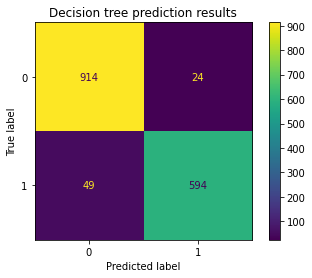

tp=594, fn=49, fp=24, tn=914
sensitivity=92.3795% (-4.199%) , specificity=97.4414% (-0.9595)
fpr=2.5586% (+0.9595%), fnr=7.6205% (+4.199)


In [75]:
# classifier
decision_tree_mc = DecisionTreeClassifier(random_state=2115, class_weight={'no': 1, 'yes': 10})
decision_tree_mc.fit(X_train, y_train)
y_prediction_decision_tree_mc = decision_tree_mc.predict(X_test)
decision_tree_mc_score = decision_tree_mc.score(X_test, y_test)
decision_tree_score_diff = decision_tree_mc_score - decision_tree_score
print(f'Decision tree score = {decision_tree_mc_score} ({decision_tree_score_diff:+})')

# confusion matrix
cm = confusion_matrix(y_test, y_prediction_decision_tree_mc)
tn, fp, fn, tp = cm.ravel()
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title(label='Decision tree prediction results')
plt.show()

# prediction results
print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')
sensitivity_dt_mc = round(100 * tp / (tp + fn), 4)
specificity_dt_mc = round(100 * tn / (fp + tn), 4)
sensitivity_dt_diff = round(sensitivity_dt_mc - sensitivity_dt, 4)
specificity_dt_diff = round(specificity_dt_mc - specificity_dt, 4)
print("sensitivity={}% ({:+}%) , specificity={}% ({:+})".format(sensitivity_dt_mc, sensitivity_dt_diff, specificity_dt_mc, specificity_dt_diff))

fpr_dt_mc = round(100 - specificity_dt_mc, 4)
fnr_dt_mc = round(100 - sensitivity_dt_mc, 4)
fpr_dt_diff = round(fpr_dt_mc - fpr_dt, 4)
fnr_dt_diff = round(fnr_dt_mc - fnr_dt, 4)
print("fpr={}% ({:+}%), fnr={}% ({:+})".format(fpr_dt_mc, fpr_dt_diff, fnr_dt_mc, fnr_dt_diff))

# 6. Ensamble learning

### 6.1 AdaBoost

### AdaBoost with DecisionTreeClassifier

********************
estimators = 10
AdaBoostClassifier score=0.9791271347248577 (+0.0025300442757748565)
tp=617, fn=26, fp=7, tn=931
sensitivity=95.9565% (-0.622%), specificity=99.2537% (+0.8528%)
FPR=0.7463% (-0.8528%), FNR=4.0435% (+0.622%)
********************
estimators = 20
AdaBoostClassifier score=0.9810246679316889 (+0.004427577482606027)
tp=621, fn=22, fp=8, tn=930
sensitivity=96.5785% (+0.0%), specificity=99.1471% (+0.7462%)
FPR=0.8529% (-0.7462%), FNR=3.4215% (+0.0%)
********************
estimators = 40
AdaBoostClassifier score=0.9816571790006325 (+0.005060088551549713)
tp=620, fn=23, fp=6, tn=932
sensitivity=96.423% (-0.1555%), specificity=99.3603% (+0.9594%)
FPR=0.6397% (-0.9594%), FNR=3.577% (+0.1555%)
********************
estimators = 60
AdaBoostClassifier score=0.9803921568627451 (+0.003795066413662229)
tp=617, fn=26, fp=5, tn=933
sensitivity=95.9565% (-0.622%), specificity=99.467% (+1.0661%)
FPR=0.533% (-1.0661%), FNR=4.0435% (+0.622%)
********************
estimators =

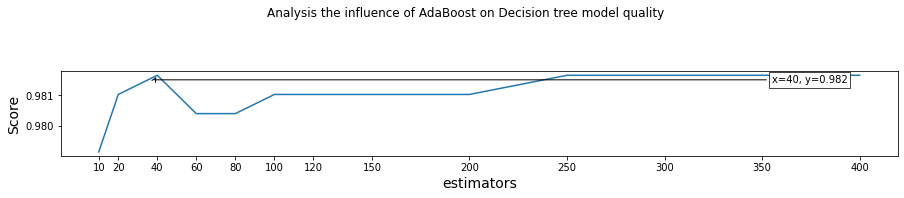

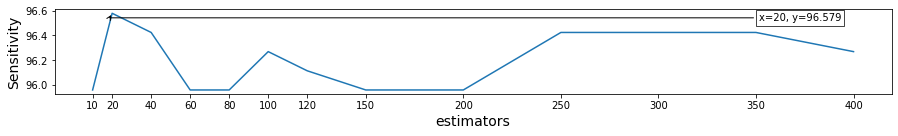

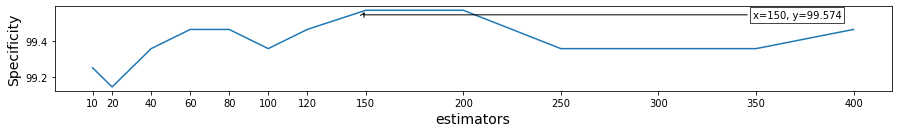

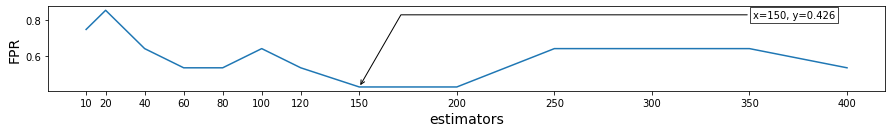

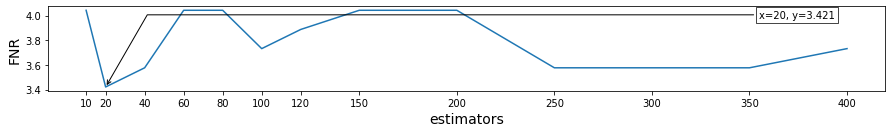

In [76]:
estimators_list = [10, 20, 40, 60, 80, 100, 120, 150, 200, 250, 300, 350, 400]
dt_ab_test_scores = []
dt_ab_test_sensitivities = []
dt_ab_test_specificities = []
dt_ab_test_fprs = []
dt_ab_test_fnrs = []

for estimators in estimators_list:
    print('*' * 20)
    print(f'estimators = {estimators}')

    # ada boost classifier with base estimator decisionTree
    adaClf2 = AdaBoostClassifier(base_estimator=decision_tree, n_estimators=estimators, learning_rate=1, random_state=2115)
    adaClf2.fit(X_train, y_train)
    y_pred_adaClf2= adaClf2.predict(X_test)
    adaClf2_score = adaClf2.score(X_test, y_test)
    dt_ab_test_scores.append(adaClf2_score)
    dt_score_diff = adaClf2_score - decision_tree_score
    print(f'AdaBoostClassifier score={adaClf2_score} ({dt_score_diff:+})')

    # confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_adaClf2).ravel()
    print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')
    sensitivity_adaClf2 = round(100 * tp / (tp + fn), 4)
    specificity_adaClf2 = round(100 * tn / (fp + tn), 4)
    dt_ab_test_sensitivities.append(sensitivity_adaClf2)
    dt_ab_test_specificities.append(specificity_adaClf2)
    sensitivity_dt_diff = round(sensitivity_adaClf2 - sensitivity_dt, 4)
    specificity_dt_diff = round(specificity_adaClf2 - specificity_dt, 4)
    print("sensitivity={}% ({:+}%), specificity={}% ({:+}%)".format(sensitivity_adaClf2, sensitivity_dt_diff, specificity_adaClf2, specificity_dt_diff))

    fpr_adaClf2 = round(100 - specificity_adaClf2, 4)
    fnr_adaClf2 = round(100 - sensitivity_adaClf2, 4)
    dt_ab_test_fprs.append(fpr_adaClf2)
    dt_ab_test_fnrs.append(fnr_adaClf2)
    fpr_dt_diff = round(fpr_adaClf2 - fpr_dt, 4)
    fnr_dt_diff = round(fnr_adaClf2 - fnr_dt, 4)
    print("FPR={}% ({:+}%), FNR={}% ({:+}%)".format(fpr_adaClf2, fpr_dt_diff, fnr_adaClf2, fnr_dt_diff))

# draw plots
title = 'Analysis the influence of AdaBoost on Decision tree model quality'
xlabel = 'estimators'
show_result(estimators_list, dt_ab_test_scores, xlabel, 'Score', 511, title=title, show_max=True)
show_result(estimators_list, dt_ab_test_sensitivities, xlabel, 'Sensitivity', 512, show_max=True)
show_result(estimators_list, dt_ab_test_specificities, xlabel, 'Specificity', 513, show_max=True)
show_result(estimators_list, dt_ab_test_fprs, xlabel, 'FPR', 514, show_max=False)
show_result(estimators_list, dt_ab_test_fnrs, xlabel, 'FNR', 515, show_max=False)

AdaBoost gives the lowest FPR for 150 estimators (0.426%), however more acceptable result has been achieved for 120 estimators, because FPR= 0.533% and FNR is around 3.888% wheras for 150 estimators FNR = 4.0435%. 

The most balanced result:

* estimators = 120
* AdaBoostClassifier score=0.9810246679316889 (+0.004427577482606027)
* tp=618, fn=25, fp=5, tn=933
* sensitivity=96.112% (-0.4665%), specificity=99.467% (+1.0661%)
* FPR=0.533% (-1.0661%), FNR=3.888% (+0.4665%)